In [5]:
import os,sys
sys.path.append("../../")
from analysis_common import *
from root_common import *

In [5]:
#CLASSES in root start with T, stuff in brackets is settable params with f1.SetParameter(0,1) changes 0 to 1
#histograms h1 = ROOT.TH1F("h1", "My Histogram Title", nbins, 0., 10.)
#h1.FillRandom("f1", 10) uses function from previous and creates histogram, does it 10 times
# draw h1.Draw() c.Draw() f1.SetMinimum(0) shows origin
#myfile = ROOT.TFile("folder location", "READ") sent from wesley
#info in file title like target material and energy lvl from genie, 100000 interactions of electrons off of material nuclei
#print(myfile.ls()) data structure is gst(genie summary tree), dont worry about backup cycle
#gst_tree = myfile.Get("gst"), get contents with gst_tree.Print() each branch is different variables 
#and descriptors of the simulation that could be plotted, use gst format from the physics and user manual
#pdg code assigns number to particle type,z atomic number of target, a atomic weight, anything neutrino actually refers
# to an electron interaction
#go from qel to nuel are interaction types
#interested in comparing models between each other, like the two different file types
#look at first the differences between the interaction types
#C:\Users\giana\OneDrive\Desktop\Fermilab location of files

Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


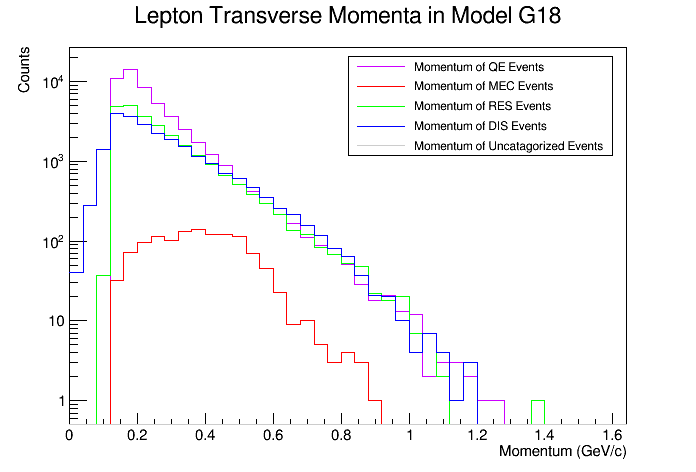

In [6]:
#making a plot looking at the lepton transverse momentum (which would be sqrt(pxl*pxl+pyl*pyl)) for events that are 
#quasi-elastic (qel=1), meson-exchange-current (mec=1), resonant interaction (res=1) and dis interactions (dis=1)
datafile = ROOT.TFile("/Data/ldmx_eTi_4GeV_G18_02a_00/ldmx_eTi_4GeV_G18_02a_00_run1.gst.root","READ")
gst_tree = datafile.Get("gst")
d = ROOT.TCanvas("d")

momentum_qe = ROOT.TH1F("momentum_qe", "", 100, 0, 4.0)
gst_tree.Project("momentum_qe", "sqrt(pxl*pxl+pyl*pyl)", "qel==1")
momentum_qe.Draw()
momentum_qe.SetLineColor(ROOT.kViolet)
momentum_qe.SetAxisRange(0., 1.6, "x")

momentum_mec = ROOT.TH1F("momentum_mec", "", 100, 0, 4.0)
gst_tree.Project("momentum_mec", "sqrt(pxl*pxl+pyl*pyl)", "mec==1")
momentum_mec.Draw("same")
momentum_mec.SetLineColor(ROOT.kRed)
momentum_mec.SetAxisRange(0., 1.6, "x")

momentum_res = ROOT.TH1F("momentum_res", "", 100, 0, 4.0)
gst_tree.Project("momentum_res", "sqrt(pxl*pxl+pyl*pyl)", "res==1")
momentum_res.Draw("same")
momentum_res.SetLineColor(ROOT.kGreen)
momentum_res.SetAxisRange(0., 1.6, "x")

momentum_dis = ROOT.TH1F("momentum_dis", "", 100, 0, 4.0)
gst_tree.Project("momentum_dis", "sqrt(pxl*pxl+pyl*pyl)", "dis==1")
momentum_dis.Draw("same")
momentum_dis.SetLineColor(ROOT.kBlue)
momentum_dis.SetAxisRange(0., 1.6, "x")

momentum_z = ROOT.TH1F("momentum_z", "", 100, 0, 4.0)
gst_tree.Project("momentum_z", "sqrt(pxl*pxl+pyl*pyl)", "dis==0&&qel==0&&res==0&&mec==0")
momentum_z.Draw("same")
momentum_z.SetLineColor(ROOT.kGray)
momentum_z.SetAxisRange(0., 1.6, "x")

momentum_qe.SetTitle("Lepton Transverse Momenta in Model G18;Momentum (GeV/c);Counts")

leg = ROOT.TLegend(0.9, 0.9, 0.9, 0.9)

leg.AddEntry("momentum_qe", "Momentum of QE Events", "l")
leg.AddEntry("momentum_mec", "Momentum of MEC Events", "l")
leg.AddEntry("momentum_res", "Momentum of RES Events", "l")
leg.AddEntry("momentum_dis", "Momentum of DIS Events", "l")
leg.AddEntry("momentum_z", "Momentum of Uncatagorized Events", "l")
leg.Draw()
d.SetLogy();
d.Draw()

In [7]:
#Chaining tree together
gst_tree = datafile.Get("gst")
gst_tree_g18 = ROOT.TChain("gst")
gst_tree_g18.AddFile("/Data/ldmx_eTi_4GeV_G18_02a_00/ldmx_eTi_4GeV_G18_02a_00_run2.gst.root") 
gst_tree_g18.AddFile("/Data/ldmx_eTi_4GeV_G18_02a_00/ldmx_eTi_4GeV_G18_02a_00_run3.gst.root")
gst_tree_g18.AddFile("/Data/ldmx_eTi_4GeV_G18_02a_00/ldmx_eTi_4GeV_G18_02a_00_run4.gst.root") 
gst_tree_g18.AddFile("/Data/ldmx_eTi_4GeV_G18_02a_00/ldmx_eTi_4GeV_G18_02a_00_run5.gst.root")
gst_tree_g18.AddFile("/Data/ldmx_eTi_4GeV_G18_02a_00/ldmx_eTi_4GeV_G18_02a_00_run6.gst.root") 
gst_tree_g18.AddFile("/Data/ldmx_eTi_4GeV_G18_02a_00/ldmx_eTi_4GeV_G18_02a_00_run7.gst.root")
gst_tree_g18.AddFile("/Data/ldmx_eTi_4GeV_G18_02a_00/ldmx_eTi_4GeV_G18_02a_00_run8.gst.root") 
gst_tree_g18.AddFile("/Data/ldmx_eTi_4GeV_G18_02a_00/ldmx_eTi_4GeV_G18_02a_00_run8.gst.root")
gst_tree_g18.AddFile("/Data/ldmx_eTi_4GeV_G18_02a_00/ldmx_eTi_4GeV_G18_02a_00_run1.gst.root") 
gst_tree_g18.AddFile("/Data/ldmx_eTi_4GeV_G18_02a_00/ldmx_eTi_4GeV_G18_02a_00_run10.gst.root")

1

Warning in <TCanvas::Constructor>: Deleting canvas with same name: d
Warning in <TFile::Append>: Replacing existing TH1: momentum_qe (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: momentum_mec (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: momentum_res (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: momentum_dis (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: momentum_z (Potential memory leak).
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


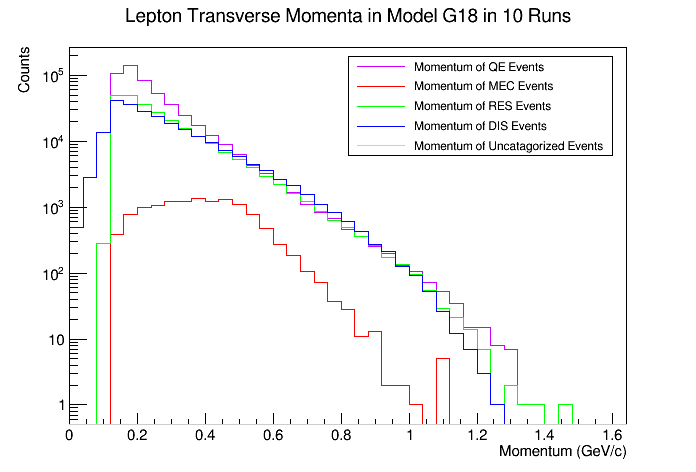

In [5]:
#making a plot looking at the lepton transverse momentum (which would be sqrt(pxl*pxl+pyl*pyl)) for events that are 
#quasi-elastic (qel=1), meson-exchange-current (mec=1), resonant interaction (res=1) and dis interactions (dis=1)
d = ROOT.TCanvas("d")

momentum_qe = ROOT.TH1F("momentum_qe", "", 100, 0, 4.0)
gst_tree_g18.Project("momentum_qe", "sqrt(pxl*pxl+pyl*pyl)", "qel==1")
momentum_qe.Draw()
momentum_qe.SetLineColor(ROOT.kViolet)
momentum_qe.SetAxisRange(0., 1.6, "x")

momentum_mec = ROOT.TH1F("momentum_mec", "", 100, 0, 4.0)
gst_tree_g18.Project("momentum_mec", "sqrt(pxl*pxl+pyl*pyl)", "mec==1")
momentum_mec.Draw("same")
momentum_mec.SetLineColor(ROOT.kRed)
momentum_mec.SetAxisRange(0., 1.6, "x")

momentum_res = ROOT.TH1F("momentum_res", "", 100, 0, 4.0)
gst_tree_g18.Project("momentum_res", "sqrt(pxl*pxl+pyl*pyl)", "res==1")
momentum_res.Draw("same")
momentum_res.SetLineColor(ROOT.kGreen)
momentum_res.SetAxisRange(0., 1.6, "x")

momentum_dis = ROOT.TH1F("momentum_dis", "", 100, 0, 4.0)
gst_tree_g18.Project("momentum_dis", "sqrt(pxl*pxl+pyl*pyl)", "dis==1")
momentum_dis.Draw("same")
momentum_dis.SetLineColor(ROOT.kBlue)
momentum_dis.SetAxisRange(0., 1.6, "x")

momentum_z = ROOT.TH1F("momentum_z", "", 100, 0, 4.0)
gst_tree_g18.Project("momentum_z", "sqrt(pxl*pxl+pyl*pyl)", "dis==0&&qel==0&&mec==0&&res==0")
momentum_z.Draw("same")
momentum_z.SetLineColor(ROOT.kGray)
momentum_z.SetAxisRange(0., 1.6, "x")

momentum_qe.SetTitle("Lepton Transverse Momenta in Model G18 in 10 Runs;Momentum (GeV/c);Counts")

leg = ROOT.TLegend(0.9, 0.9, 0.9, 0.9)

leg.AddEntry("momentum_qe", "Momentum of QE Events", "l")
leg.AddEntry("momentum_mec", "Momentum of MEC Events", "l")
leg.AddEntry("momentum_res", "Momentum of RES Events", "l")
leg.AddEntry("momentum_dis", "Momentum of DIS Events", "l")
leg.AddEntry("momentum_z", "Momentum of Uncatagorized Events", "l")
leg.Draw()
d.SetLogy();
d.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: d
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


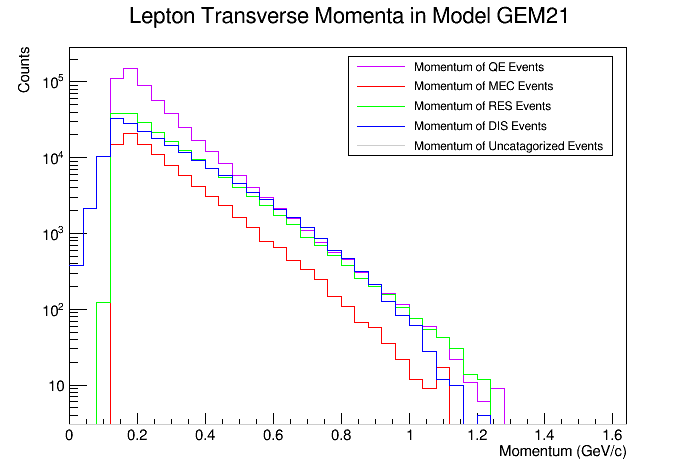

In [230]:
#pt for gem21
datafile = ROOT.TFile("/Data/ldmx_eTi_4GeV_GEM21_11b_00/ldmx_eTi_4GeV_GEM21_11b_00_run1.gst.root","READ")
gst_tree = datafile.Get("gst")
d = ROOT.TCanvas("d")

momentum_qe = ROOT.TH1F("momentum_qe", "", 100, 0, 4.0)
gst_tree_gem.Project("momentum_qe", "sqrt(pxl*pxl+pyl*pyl)", "qel==1")
momentum_qe.Draw()
momentum_qe.SetLineColor(ROOT.kViolet)
momentum_qe.SetAxisRange(0., 1.6, "x")

momentum_mec = ROOT.TH1F("momentum_mec", "", 100, 0, 4.0)
gst_tree_gem.Project("momentum_mec", "sqrt(pxl*pxl+pyl*pyl)", "mec==1")
momentum_mec.Draw("same")
momentum_mec.SetLineColor(ROOT.kRed)
momentum_mec.SetAxisRange(0., 1.6, "x")

momentum_res = ROOT.TH1F("momentum_res", "", 100, 0, 4.0)
gst_tree_gem.Project("momentum_res", "sqrt(pxl*pxl+pyl*pyl)", "res==1")
momentum_res.Draw("same")
momentum_res.SetLineColor(ROOT.kGreen)
momentum_res.SetAxisRange(0., 1.6, "x")

momentum_dis = ROOT.TH1F("momentum_dis", "", 100, 0, 4.0)
gst_tree_gem.Project("momentum_dis", "sqrt(pxl*pxl+pyl*pyl)", "dis==1")
momentum_dis.Draw("same")
momentum_dis.SetLineColor(ROOT.kBlue)
momentum_dis.SetAxisRange(0., 1.6, "x")

momentum_z = ROOT.TH1F("momentum_z", "", 100, 0, 4.0)
gst_tree_gem.Project("momentum_z", "sqrt(pxl*pxl+pyl*pyl)", "dis==0&&qel==0&&mec==0&&res==0")
momentum_z.Draw("same")
momentum_z.SetLineColor(ROOT.kGray)
momentum_z.SetAxisRange(0., 1.6, "x")

momentum_qe.SetTitle("Lepton Transverse Momenta in Model GEM21;Momentum (GeV/c);Counts")

leg = ROOT.TLegend(0.9, 0.9, 0.9, 0.9)

leg.AddEntry("momentum_qe", "Momentum of QE Events", "l")
leg.AddEntry("momentum_mec", "Momentum of MEC Events", "l")
leg.AddEntry("momentum_res", "Momentum of RES Events", "l")
leg.AddEntry("momentum_dis", "Momentum of DIS Events", "l")
leg.AddEntry("momentum_z", "Momentum of Uncatagorized Events", "l")

leg.Draw()
d.SetLogy();
d.Draw()

In [8]:
gst_tree = datafile.Get("gst")
gst_tree_gem = ROOT.TChain("gst")
gst_tree_gem.AddFile("/Data/ldmx_eTi_4GeV_GEM21_11b_00/ldmx_eTi_4GeV_GEM21_11b_00_run1.gst.root") 
gst_tree_gem.AddFile("/Data/ldmx_eTi_4GeV_GEM21_11b_00/ldmx_eTi_4GeV_GEM21_11b_00_run2.gst.root")
gst_tree_gem.AddFile("/Data/ldmx_eTi_4GeV_GEM21_11b_00/ldmx_eTi_4GeV_GEM21_11b_00_run3.gst.root")
gst_tree_gem.AddFile("/Data/ldmx_eTi_4GeV_GEM21_11b_00/ldmx_eTi_4GeV_GEM21_11b_00_run4.gst.root")
gst_tree_gem.AddFile("/Data/ldmx_eTi_4GeV_GEM21_11b_00/ldmx_eTi_4GeV_GEM21_11b_00_run5.gst.root")
gst_tree_gem.AddFile("/Data/ldmx_eTi_4GeV_GEM21_11b_00/ldmx_eTi_4GeV_GEM21_11b_00_run6.gst.root")
gst_tree_gem.AddFile("/Data/ldmx_eTi_4GeV_GEM21_11b_00/ldmx_eTi_4GeV_GEM21_11b_00_run7.gst.root")
gst_tree_gem.AddFile("/Data/ldmx_eTi_4GeV_GEM21_11b_00/ldmx_eTi_4GeV_GEM21_11b_00_run8.gst.root")
gst_tree_gem.AddFile("/Data/ldmx_eTi_4GeV_GEM21_11b_00/ldmx_eTi_4GeV_GEM21_11b_00_run9.gst.root")
gst_tree_gem.AddFile("/Data/ldmx_eTi_4GeV_GEM21_11b_00/ldmx_eTi_4GeV_GEM21_11b_00_run10.gst.root")

1

Warning in <TCanvas::Constructor>: Deleting canvas with same name: d
Warning in <TFile::Append>: Replacing existing TH1: momentum_qe (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: momentum_mec (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: momentum_res (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: momentum_dis (Potential memory leak).
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


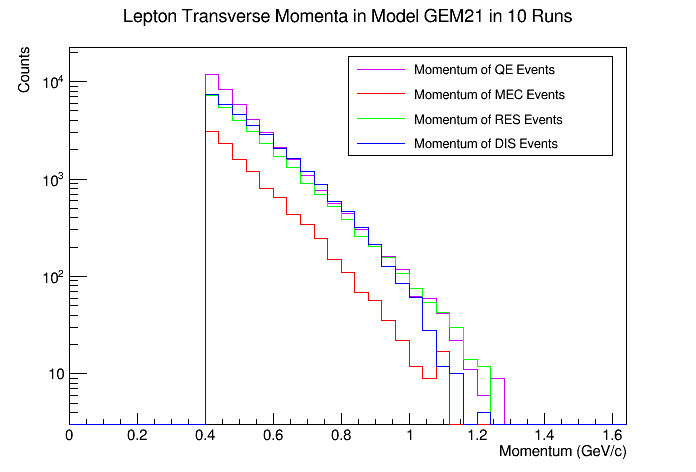

In [205]:
#pt for gem21 tchain and greater than 0.4 gev
d = ROOT.TCanvas("d")

momentum_qe = ROOT.TH1F("momentum_qe", "", 100, 0, 4.0)
gst_tree_gem.Project("momentum_qe", "sqrt(pxl*pxl+pyl*pyl)", "qel==1&&sqrt(pxl*pxl+pyl*pyl)>0.4")
momentum_qe.Draw()
momentum_qe.SetLineColor(ROOT.kViolet)
momentum_qe.SetAxisRange(0., 1.6, "x")

momentum_mec = ROOT.TH1F("momentum_mec", "", 100, 0, 4.0)
gst_tree_gem.Project("momentum_mec", "sqrt(pxl*pxl+pyl*pyl)", "mec==1&&sqrt(pxl*pxl+pyl*pyl)>0.4")
momentum_mec.Draw("same")
momentum_mec.SetLineColor(ROOT.kRed)
momentum_mec.SetAxisRange(0., 1.6, "x")

momentum_res = ROOT.TH1F("momentum_res", "", 100, 0, 4.0)
gst_tree_gem.Project("momentum_res", "sqrt(pxl*pxl+pyl*pyl)", "res==1&&sqrt(pxl*pxl+pyl*pyl)>0.4")
momentum_res.Draw("same")
momentum_res.SetLineColor(ROOT.kGreen)
momentum_res.SetAxisRange(0., 1.6, "x")

momentum_dis = ROOT.TH1F("momentum_dis", "", 100, 0, 4.0)
gst_tree_gem.Project("momentum_dis", "sqrt(pxl*pxl+pyl*pyl)", "dis==1&&sqrt(pxl*pxl+pyl*pyl)>0.4")
momentum_dis.Draw("same")
momentum_dis.SetLineColor(ROOT.kBlue)
momentum_dis.SetAxisRange(0., 1.6, "x")

momentum_qe.SetTitle("Lepton Transverse Momenta in Model GEM21 in 10 Runs;Momentum (GeV/c);Counts")

leg = ROOT.TLegend(0.9, 0.9, 0.9, 0.9)

leg.AddEntry("momentum_qe", "Momentum of QE Events", "l")
leg.AddEntry("momentum_mec", "Momentum of MEC Events", "l")
leg.AddEntry("momentum_res", "Momentum of RES Events", "l")
leg.AddEntry("momentum_dis", "Momentum of DIS Events", "l")

leg.Draw()
d.SetLogy();
d.Draw()

In [ ]:
#number of pions per event broken down by interaction type in GEM21
g = ROOT.TCanvas("g")

final_qel = ROOT.TH1F("final_qel", "", 10, 0, 10.0)
gst_tree_gem.Project("final_qel", "nfpip + nfpim + nfpi0", "qel==1")
final_qel.Draw("same")
final_qel.SetLineColor(ROOT.kViolet)

final_mec = ROOT.TH1F("final_mec", "", 10, 0, 10.0)
gst_tree_gem.Project("final_mec", "nfpip + nfpim + nfpi0", "mec==1")
final_mec.Draw("same")
final_mec.SetLineColor(ROOT.kRed)

final_res = ROOT.TH1F("final_res", "", 10, 0, 10.0)
gst_tree_gem.Project("final_res", "nfpip + nfpim + nfpi0", "res==1")
final_res.Draw("same")
final_res.SetLineColor(ROOT.kGreen)

final_dis = ROOT.TH1F("final_dis", "", 10, 0, 10.0)
gst_tree_gem.Project("final_dis", "nfpip + nfpim + nfpi0", "dis==1")
final_dis.Draw("same")
final_dis.SetLineColor(ROOT.kBlue)

final_z = ROOT.TH1F("final_z", "", 10, 0, 10.0)
gst_tree_gem.Project("final_z", "", "nfpip + nfpim + nfpi0", "qel==0&&mec==0&&res==0&&dis==0")
final_z.Draw("same")
final_z.SetLineColor(ROOT.kGray)

leg = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

leg.AddEntry("final_qel", "Amount in QE Events", "l")
leg.AddEntry("final_mec", "Amount in MEC Events", "l")
leg.AddEntry("final_res", "Amount in RES Events", "l")
leg.AddEntry("final_dis", "Amount in DIS Events", "l")
leg.AddEntry("final_z", "Amount in Uncatagorized Events", "l")

final_qel.SetTitle("Amount of Final State Pions Per Interaction Type;(x);Counts")
leg.Draw()
g.Draw()

In [ ]:
#number of protons per event broken down by interaction type in GEM21
g = ROOT.TCanvas("g")

final_qel = ROOT.TH1F("final_qel", "", 20, 0, 20.0)
gst_tree_gem.Project("final_qel", "nfp", "qel==1")
final_qel.Draw("same")
final_qel.SetLineColor(ROOT.kViolet)

final_mec = ROOT.TH1F("final_mec", "", 20, 0, 20.0)
gst_tree_gem.Project("final_mec", "nfp", "mec==1")
final_mec.Draw("same")
final_mec.SetLineColor(ROOT.kRed)

final_res = ROOT.TH1F("final_res", "", 20, 0, 20.0)
gst_tree_gem.Project("final_res", "nfp", "res==1")
final_res.Draw("same")
final_res.SetLineColor(ROOT.kGreen)

final_dis = ROOT.TH1F("final_dis", "", 20, 0, 20.0)
gst_tree_gem.Project("final_dis", "nfp ", "dis==1")
final_dis.Draw("same")
final_dis.SetLineColor(ROOT.kBlue)

final_z = ROOT.TH1F("final_z", "", 20, 0, 2.0)
gst_tree_gem.Project("final_z", "nfp", "dis==0&&qel==0&&res==0&&mec==0")
final_z.Draw("same")
final_z.SetLineColor(ROOT.kGray)

leg = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

leg.AddEntry("final_qel", "Amount in QE Events", "l")
leg.AddEntry("final_mec", "Amount in MEC Events", "l")
leg.AddEntry("final_res", "Amount in RES Events", "l")
leg.AddEntry("final_dis", "Amount in DIS Events", "l")
leg.AddEntry("final_z", "Amount in Uncatagorized Events", "l")

final_qel.SetTitle("Amount of Final State Protons Per Interaction Type;(x);Counts")
leg.Draw()
g.Draw()

In [ ]:
#number of neutrons per event broken down by interaction type in GEM21
g = ROOT.TCanvas("g")

final_qel = ROOT.TH1F("final_qel", "", 20, 0, 20.0)
gst_tree_gem.Project("final_qel", "nfn", "qel==1")
final_qel.Draw("same")
final_qel.SetLineColor(ROOT.kViolet)

final_mec = ROOT.TH1F("final_mec", "", 20, 0, 20.0)
gst_tree_gem.Project("final_mec", "nfn", "mec==1")
final_mec.Draw("same")
final_mec.SetLineColor(ROOT.kRed)

final_res = ROOT.TH1F("final_res", "", 20, 0, 20.0)
gst_tree.Project("final_res", "nfn", "res==1")
final_res.Draw("same")
final_res.SetLineColor(ROOT.kGreen)

final_dis = ROOT.TH1F("final_dis", "", 20, 0, 20.0)
gst_tree_gem.Project("final_dis", "nfn", "dis==1")
final_dis.Draw("same")
final_dis.SetLineColor(ROOT.kBlue)

final_z = ROOT.TH1F("final_z", "", 20, 0, 20.0)
gst_tree_gem.Project("final_z", "nfn", "dis==0&&qel==0&&res==0&&mec==0")
final_z.Draw("same")
final_z.SetLineColor(ROOT.kGray)

leg = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

leg.AddEntry("final_qel", "Amount in QE Events", "l")
leg.AddEntry("final_mec", "Amount in MEC Events", "l")
leg.AddEntry("final_res", "Amount in RES Events", "l")
leg.AddEntry("final_dis", "Amount in DIS Events", "l")
leg.AddEntry("final_z", "Amount in Uncatagorized Events", "l")

final_qel.SetTitle("Amount of Final State Neutrons Per Interaction Type;(x);Counts")
leg.Draw()
g.Draw()

In [ ]:
#comparing pions in qe between models G18 and GEM21
g = ROOT.TCanvas("g")

final_qel = ROOT.TH1F("final_qel", "", 10, 0, 10.0)
gst_tree_gem.Project("final_qel", "nfpip + nfpim + nfpi0", "qel==1")
final_qel.Draw("same")
final_qel.SetLineColor(ROOT.kViolet)

final_qe = ROOT.TH1F("final_qe", "", 10, 0, 10.0)
gst_tree_g18.Project("final_qe", "nfpip + nfpim + nfpi0", "qel==1")
final_qe.Draw("same")
final_qe.SetLineColor(ROOT.kBlue)

leg = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

leg.AddEntry("final_qel", "Amount in Pions in GEM21", "l")
leg.AddEntry("final_qe", "Amount in Pions in G18", "l")

final_qel.SetTitle("Amount of Pions Produced From QE Interactions Per Model;(x);Counts")
leg.Draw()

g.Draw()

#comparing pions in mec between models G18 and GEM21
j = ROOT.TCanvas("j")

final_qelm = ROOT.TH1F("final_qelm", "", 10, 0, 10.0)
gst_tree_gem.Project("final_qelm", "nfpip + nfpim + nfpi0", "mec==1")
final_qelm.Draw("same")
final_qelm.SetLineColor(ROOT.kViolet)

final_qem = ROOT.TH1F("final_qem", "", 10, 0, 10.0)
gst_tree_g18.Project("final_qem", "nfpip + nfpim + nfpi0", "mec==1")
final_qem.Draw("same")
final_qem.SetLineColor(ROOT.kBlue)

leg = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

leg.AddEntry("final_qelm", "Amount in Pions in GEM21", "l")
leg.AddEntry("final_qem", "Amount in Pions in G18", "l")

final_qelm.SetTitle("Amount of Pions Produced From MEC Interactions Per Model;(x);Counts")
leg.Draw()

j.Draw()

#comparing pions in res between models G18 and GEM21
k = ROOT.TCanvas("k")

final_qelr = ROOT.TH1F("final_qelr", "", 10, 0, 10.0)
gst_tree_gem.Project("final_qelr", "nfpip + nfpim + nfpi0", "res==1")
final_qelr.Draw("same")
final_qelr.SetLineColor(ROOT.kViolet)

final_qer = ROOT.TH1F("final_qer", "", 10, 0, 10.0)
gst_tree_g18.Project("final_qer", "nfpip + nfpim + nfpi0", "res==1")
final_qer.Draw("same")
final_qer.SetLineColor(ROOT.kBlue)

leg = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

leg.AddEntry("final_qelr", "Amount in Pions in GEM21", "l")
leg.AddEntry("final_qer", "Amount in Pions in G18", "l")

final_qelr.SetTitle("Amount of Pions Produced From RES Interactions Per Model;(x);Counts")
leg.Draw()

k.Draw()

#comparing pions in dis between models G18 and GEM21
l = ROOT.TCanvas("l")

final_qeld = ROOT.TH1F("final_qeld", "", 10, 0, 10.0)
gst_tree_gem.Project("final_qeld", "nfpip + nfpim + nfpi0", "dis==1")
final_qeld.Draw("same")
final_qeld.SetLineColor(ROOT.kViolet)

final_qed = ROOT.TH1F("final_qed", "", 10, 0, 10.0)
gst_tree_g18.Project("final_qed", "nfpip + nfpim + nfpi0", "dis==1")
final_qed.Draw("same")
final_qed.SetLineColor(ROOT.kBlue)

leg = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

leg.AddEntry("final_qeld", "Amount in Pions in GEM21", "l")
leg.AddEntry("final_qed", "Amount in Pions in G18", "l")

final_qeld.SetTitle("Amount of Pions Produced From DIS Interactions Per Model;(x);Counts")
leg.Draw()

l.Draw()

In [ ]:
#comparing amount of protons in qe between models g18 gem21
g = ROOT.TCanvas("g")

final_p21q = ROOT.TH1F("final_p21q", "", 20, 0, 20.0)
gst_tree_gem.Project("final_p21q", "nfp", "qel==1")
final_p21q.Draw("same")
final_p21q.SetLineColor(ROOT.kViolet)

final_p18q = ROOT.TH1F("final_p18q", "", 20, 0, 20.0)
gst_tree_g18.Project("final_p18q", "nfp", "qel==1")
final_p18q.Draw("same")
final_p18q.SetLineColor(ROOT.kBlue)

leg = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

leg.AddEntry("final_p21q", "Amount in Protons in GEM21", "l")
leg.AddEntry("final_p18q", "Amount in Protons in G18", "l")

final_p21q.SetTitle("Amount of Protons Produced from QE Interactions Per Model;(x);Counts")
leg.Draw()

g.Draw()

#comparing amount of protons in mec between models g18 gem21
a = ROOT.TCanvas("a")

final_p21m = ROOT.TH1F("final_p21m", "", 20, 0, 20.0)
gst_tree_gem.Project("final_p21m", "nfp", "mec==1")
final_p21m.Draw("same")
final_p21m.SetLineColor(ROOT.kViolet)

final_p18m = ROOT.TH1F("final_p18m", "", 20, 0, 20.0)
gst_tree_g18.Project("final_p18m", "nfp", "mec==1")
final_p18m.Draw("same")
final_p18m.SetLineColor(ROOT.kBlue)

leg = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

leg.AddEntry("final_p21m", "Amount in Protons in GEM21", "l")
leg.AddEntry("final_p18m", "Amount in Protons in G18", "l")

final_p21m.SetTitle("Amount of Protons Produced from MEC Interactions Per Model;(x);Counts")
leg.Draw()

a.Draw()

#comparing amount of protons in res between models g18 gem21
b = ROOT.TCanvas("b")

final_p21r = ROOT.TH1F("final_p21r", "", 20, 0, 20.0)
gst_tree_gem.Project("final_p21r", "nfp", "res==1")
final_p21r.Draw("same")
final_p21r.SetLineColor(ROOT.kViolet)

final_p18r = ROOT.TH1F("final_p18r", "", 20, 0, 20.0)
gst_tree_g18.Project("final_p18r", "nfp", "res==1")
final_p18r.Draw("same")
final_p18r.SetLineColor(ROOT.kBlue)

leg = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

leg.AddEntry("final_p21r", "Amount in Protons in GEM21", "l")
leg.AddEntry("final_p18r", "Amount in Protons in G18", "l")

final_p21r.SetTitle("Amount of Protons Produced from RES Interactions Per Model;(x);Counts")
leg.Draw()

b.Draw()

#comparing amount of protons in dis between models g18 gem21
c = ROOT.TCanvas("c")

final_p21d = ROOT.TH1F("final_p21d", "", 20, 0, 20.0)
gst_tree_gem.Project("final_p21d", "nfp", "dis==1")
final_p21d.Draw("same")
final_p21d.SetLineColor(ROOT.kViolet)

final_p18d = ROOT.TH1F("final_p18d", "", 20, 0, 20.0)
gst_tree_g18.Project("final_p18d", "nfp", "dis==1")
final_p18d.Draw("same")
final_p18d.SetLineColor(ROOT.kBlue)

leg = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

leg.AddEntry("final_p21d", "Amount in Protons in GEM21", "l")
leg.AddEntry("final_p18d", "Amount in Protons in G18", "l")

final_p21d.SetTitle("Amount of Protons Produced from DIS Interactions Per Model;(x);Counts")
leg.Draw()

c.Draw()

In [ ]:
# comparing amount of neutrons in qe between models g18 gem21
g = ROOT.TCanvas("g")

final_p21 = ROOT.TH1F("final_p21", "", 20, 0, 20.0)
gst_tree_gem.Project("final_p21", "nfn", "qel==1")
final_p21.Draw("same")
final_p21.SetLineColor(ROOT.kViolet)

final_p18 = ROOT.TH1F("final_p18", "", 20, 0, 20.0)
gst_tree_g18.Project("final_p18", "nfn", "qel==1")
final_p18.Draw("same")
final_p18.SetLineColor(ROOT.kBlue)

leg = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

leg.AddEntry("final_p21", "Amount in Neutrons in GEM21", "l")
leg.AddEntry("final_p18", "Amount in Neutrons in G18", "l")

final_p21.SetTitle("Amount of Neutrons Produced from QE Interactions Per Model;(x);Counts")
leg.Draw()

g.Draw()

#comparing amount of neutrons in mec between models g18 and gem21
p = ROOT.TCanvas("p")

final_p21m = ROOT.TH1F("final_p21m", "", 20, 0, 20.0)
gst_tree_gem.Project("final_p21m", "nfn", "mec==1")
final_p21m.Draw("same")
final_p21m.SetLineColor(ROOT.kViolet)

final_p18m = ROOT.TH1F("final_p18m", "", 20, 0, 20.0)
gst_tree_g18.Project("final_p18m", "nfn", "mec==1")
final_p18m.Draw("same")
final_p18m.SetLineColor(ROOT.kBlue)

legm = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

legm.AddEntry("final_p21m", "Amount in Neutrons in GEM21", "l")
legm.AddEntry("final_p18m", "Amount in Neutrons in G18", "l")

final_p21m.SetTitle("Amount of Neutrons Produced from MEC Interactions Per Model;(x);Counts")
legm.Draw()

p.Draw()

#comparing amount of neutrons in res between models g18 and gem21
o = ROOT.TCanvas("o")

final_p21r = ROOT.TH1F("final_p21r", "", 20, 0, 20.0)
gst_tree_gem.Project("final_p21r", "nfn", "res==1")
final_p21r.Draw("same")
final_p21r.SetLineColor(ROOT.kViolet)

final_p18r = ROOT.TH1F("final_p18r", "", 20, 0, 20.0)
gst_tree_g18.Project("final_p18r", "nfn", "res==1")
final_p18r.Draw("same")
final_p18r.SetLineColor(ROOT.kBlue)

legr = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

legr.AddEntry("final_p21r", "Amount in Neutrons in GEM21", "l")
legr.AddEntry("final_p18r", "Amount in Neutrons in G18", "l")

final_p21r.SetTitle("Amount of Neutrons Produced from RES Interactions Per Model;(x);Counts")
legr.Draw()

o.Draw()

#comparing amount of neutrons in dis between models g18 and gem21
y = ROOT.TCanvas("y")

final_p21d = ROOT.TH1F("final_p21d", "", 20, 0, 20.0)
gst_tree_gem.Project("final_p21d", "nfn", "dis==1")
final_p21d.Draw("same")
final_p21d.SetLineColor(ROOT.kViolet)

final_p18d = ROOT.TH1F("final_p18d", "", 20, 0, 20.0)
gst_tree_g18.Project("final_p18d", "nfn", "dis==1")
final_p18d.Draw("same")
final_p18d.SetLineColor(ROOT.kBlue)

legd = ROOT.TLegend(0.8, 0.8, 0.8, 0.8)

legd.AddEntry("final_p21d", "Amount in Neutrons in GEM21", "l")
legd.AddEntry("final_p18d", "Amount in Neutrons in G18", "l")

final_p21d.SetTitle("Amount of Neutrons Produced from DIS Interactions Per Model;(x);Counts")
legd.Draw()

y.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TCanvas::Constructor>: Deleting canvas with same name: a
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TCanvas::Constructor>: Deleting canvas with same name: m
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TCanvas::Constructor>: Deleting canvas with same name: r
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TCanvas::Constructor>: Deleting canvas with same name: d
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


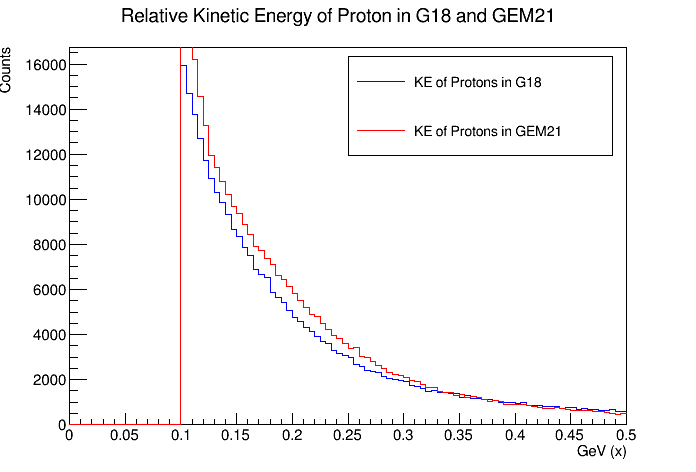

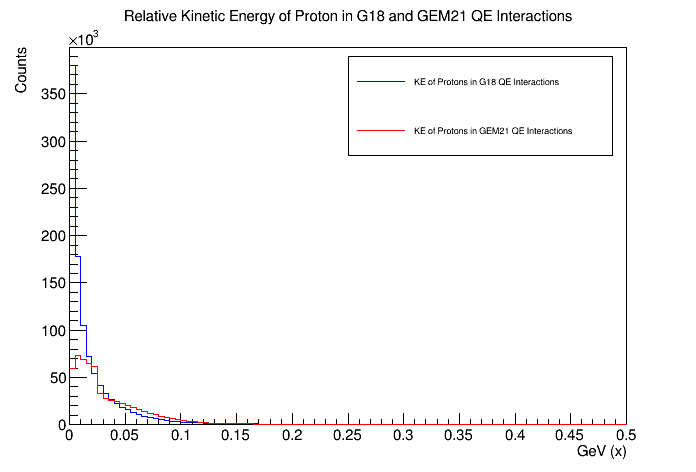

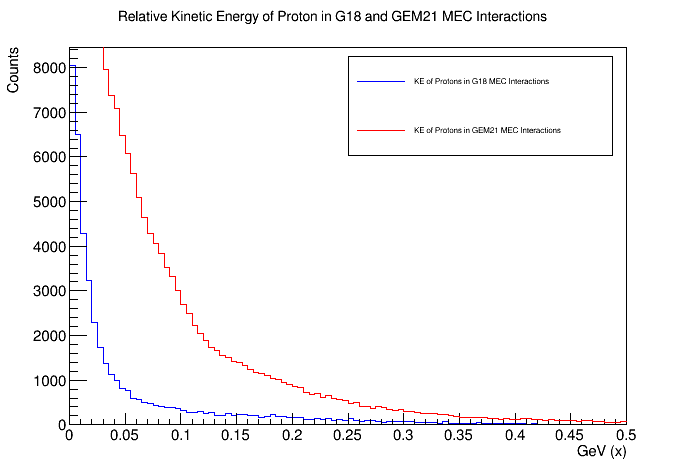

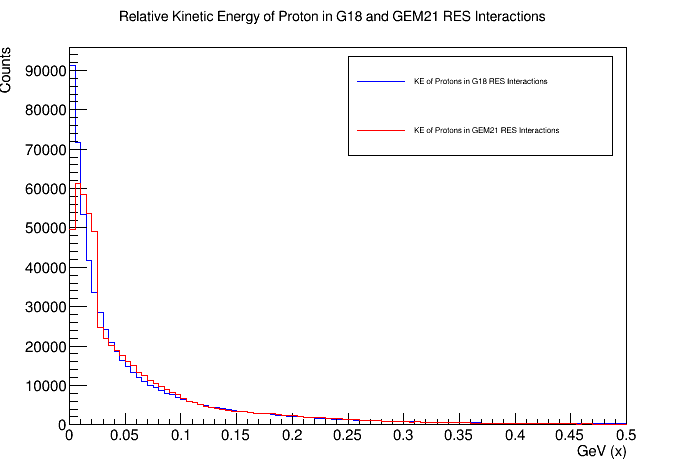

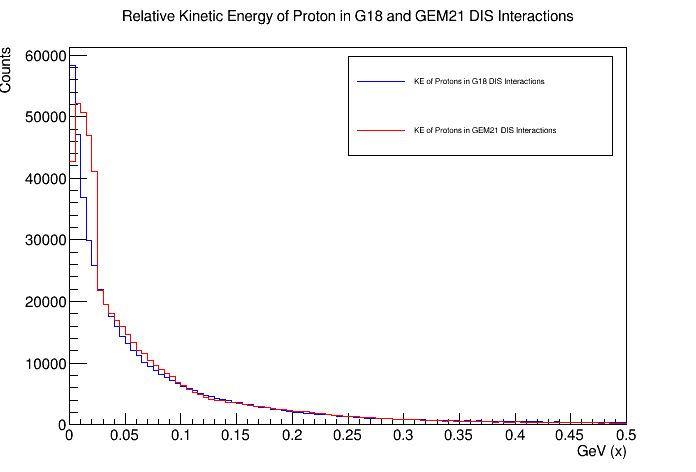

In [237]:
#relativistic kinetic energy of proton in diff interaction types
#general case
h = ROOT.TCanvas("h")
k_proton_g18 = ROOT.TH1F("k_proton_g18", "", 100, 0, 0.5)
k_proton_g21 = ROOT.TH1F("k_proton_g21", "", 100, 0, 0.5)

gst_tree_g18.Project("k_proton_g18", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2212&&Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)>0.1")
gst_tree_gem.Project("k_proton_g21", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2212&&Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)>0.1")

k_proton_g18.Draw("same")
k_proton_g21.Draw("same")

k_proton_g18.SetTitle("Relative Kinetic Energy of Proton in G18 and GEM21;GeV (x); Counts")

k_proton_g18.SetLineColor(ROOT.kBlue)
k_proton_g21.SetLineColor(ROOT.kRed)


legh = ROOT.TLegend(1,1,1,1)
legh.AddEntry("k_proton_g18", "KE of Protons in G18", "l")
legh.AddEntry("k_proton_g21", "KE of Protons in GEM21", "l")

legh.Draw()
h.Draw()

#quasi elastic case
a = ROOT.TCanvas("a")
k_proton_g18q = ROOT.TH1F("k_proton_g18q", "", 100, 0, 0.5)
k_proton_g21q = ROOT.TH1F("k_proton_g21q", "", 100, 0, 0.5)

gst_tree_g18.Project("k_proton_g18q", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2212&&qel==1")
gst_tree_gem.Project("k_proton_g21q", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2212&&qel==1")

k_proton_g18q.Draw("same")
k_proton_g21q.Draw("same")

k_proton_g18q.SetTitle("Relative Kinetic Energy of Proton in G18 and GEM21 QE Interactions;GeV (x); Counts")

k_proton_g18q.SetLineColor(ROOT.kBlue)
k_proton_g21q.SetLineColor(ROOT.kRed)


lega = ROOT.TLegend(1,1,1,1)
lega.AddEntry("k_proton_g18q", "KE of Protons in G18 QE Interactions", "l")
lega.AddEntry("k_proton_g21q", "KE of Protons in GEM21 QE Interactions", "l")

lega.Draw()
a.Draw()

#mec case
m = ROOT.TCanvas("m")
k_proton_g18m = ROOT.TH1F("k_proton_g18m", "", 100, 0, 0.5)
k_proton_g21m = ROOT.TH1F("k_proton_g21m", "", 100, 0, 0.5)

gst_tree_g18.Project("k_proton_g18m", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2212&&mec==1")
gst_tree_gem.Project("k_proton_g21m", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2212&&mec==1")

k_proton_g18m.Draw("same")
k_proton_g21m.Draw("same")

k_proton_g18m.SetTitle("Relative Kinetic Energy of Proton in G18 and GEM21 MEC Interactions;GeV (x); Counts")

k_proton_g18m.SetLineColor(ROOT.kBlue)
k_proton_g21m.SetLineColor(ROOT.kRed)


legm = ROOT.TLegend(0.9, 0.9, 0.9, 0.9)
legm.AddEntry("k_proton_g18m", "KE of Protons in G18 MEC Interactions", "l")
legm.AddEntry("k_proton_g21m", "KE of Protons in GEM21 MEC Interactions", "l")

legm.Draw()
m.Draw()

#res case
r = ROOT.TCanvas("r")
k_proton_g18r = ROOT.TH1F("k_proton_g18r", "", 100, 0, 0.5)
k_proton_g21r = ROOT.TH1F("k_proton_g21r", "", 100, 0, 0.5)

gst_tree_g18.Project("k_proton_g18r", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2212&&res==1")
gst_tree_gem.Project("k_proton_g21r", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2212&&res==1")

k_proton_g18r.Draw("same")
k_proton_g21r.Draw("same")

k_proton_g18r.SetTitle("Relative Kinetic Energy of Proton in G18 and GEM21 RES Interactions;GeV (x); Counts")

k_proton_g18r.SetLineColor(ROOT.kBlue)
k_proton_g21r.SetLineColor(ROOT.kRed)


legr = ROOT.TLegend(1,1,1,1)
legr.AddEntry("k_proton_g18r", "KE of Protons in G18 RES Interactions", "l")
legr.AddEntry("k_proton_g21r", "KE of Protons in GEM21 RES Interactions", "l")

legr.Draw()
r.Draw()

#dis case
d = ROOT.TCanvas("d")
k_proton_g18d = ROOT.TH1F("k_proton_g18d", "", 100, 0, 0.5)
k_proton_g21d = ROOT.TH1F("k_proton_g21d", "", 100, 0, 0.5)

gst_tree_g18.Project("k_proton_g18d", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2212&&dis==1")
gst_tree_gem.Project("k_proton_g21d", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2212&&dis==1")

k_proton_g18d.Draw("same")
k_proton_g21d.Draw("same")

k_proton_g18d.SetTitle("Relative Kinetic Energy of Proton in G18 and GEM21 DIS Interactions;GeV (x); Counts")

k_proton_g18d.SetLineColor(ROOT.kBlue)
k_proton_g21d.SetLineColor(ROOT.kRed)


legd = ROOT.TLegend(1,1,1,1)
legd.AddEntry("k_proton_g18d", "KE of Protons in G18 DIS Interactions", "l")
legd.AddEntry("k_proton_g21d", "KE of Protons in GEM21 DIS Interactions", "l")

legd.Draw()
d.Draw()

468949.0 v2 amount of data points
1048083.0 v1 amount of data points


Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: k_proton_g18v2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: k_proton_g18v1 (Potential memory leak).
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


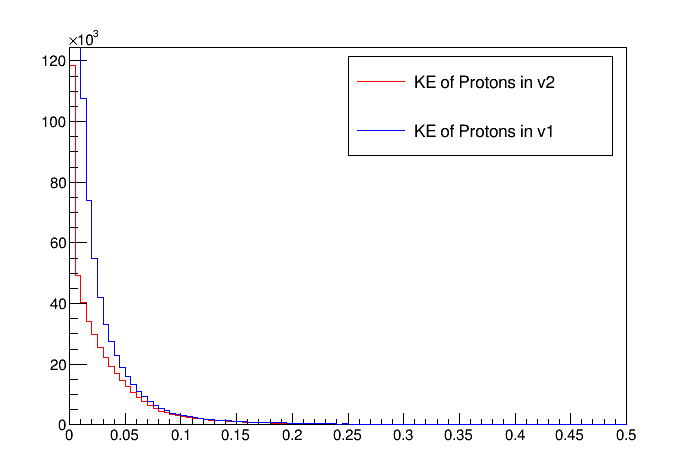

In [236]:
#relativistic kinetic energy checking if rest mass equation matches rest mass of proton in g18
h = ROOT.TCanvas("h")
k_proton_g18v2 = ROOT.TH1F("k_proton_g18v2", "", 100, 0, 0.5)
k_proton_g18v1 = ROOT.TH1F("k_proton_g18v1", "", 100, 0, 0.5)

gst_tree_g18.Project("k_proton_g18v2", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgi==2212&&qel==1")
gst_tree_g18.Project("k_proton_g18v1", "Ef - .938", "pdgf==2212&&qel==1")

k_proton_g18v2.Draw("same")
k_proton_g18v1.Draw("same")

print(k_proton_g18v2.GetEntries(), "v2 amount of data points")
print(k_proton_g18v1.GetEntries(), "v1 amount of data points")


k_proton_g18v1.SetTitle("Relative Kinetic Energy of Protons in v1 and v2;GeV (x); Counts")

k_proton_g18v1.SetLineColor(ROOT.kBlue)
k_proton_g18v2.SetLineColor(ROOT.kRed)


legd = ROOT.TLegend(2,2,2,2)

legd.AddEntry("k_proton_g18v2", "KE of Protons in v2", "l")
legd.AddEntry("k_proton_g18v1", "KE of Protons in v1", "l")

legd.Draw()
h.Draw()

#468949.0 v2 amount of data points
#1048083.0 v1 amount of data points

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: k_proton_g18v2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: k_proton_g18v1 (Potential memory leak).
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


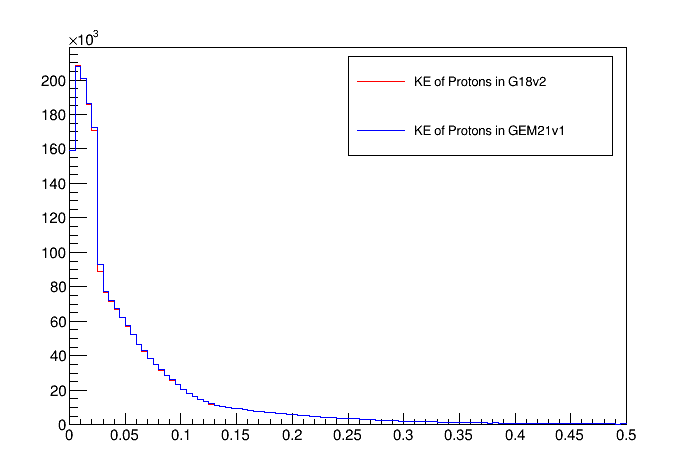

In [194]:
#relativistic kinetic energy checking if rest mass equation matches rest mass of proton in gem
h = ROOT.TCanvas("h")
k_proton_g18v2 = ROOT.TH1F("k_proton_g18v2", "", 100, 0, 0.5)
k_proton_g18v1 = ROOT.TH1F("k_proton_g18v1", "", 100, 0, 0.5)

gst_tree_gem.Project("k_proton_g18v2", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2212")
gst_tree_gem.Project("k_proton_g18v1", "Ef - .938", "pdgf==2212")

#gst_tree_gem.Project("k_proton_g21", "Ef - (sqrt(Ef**2 - (sqrt(pxl**2+pyl**2+pzl**2))))", "pdgf==2212")

k_proton_g18v2.Draw("same")
k_proton_g18v1.Draw("same")

k_proton_g18v1.SetTitle("Relative Kinetic Energy of Protons in G18 and GEM21 V2;GeV (x); Counts")

k_proton_g18v1.SetLineColor(ROOT.kBlue)
k_proton_g18v2.SetLineColor(ROOT.kRed)


legd = ROOT.TLegend(2,2,2,2)

legd.AddEntry("k_proton_g18v2", "KE of Protons in G18v2", "l")
legd.AddEntry("k_proton_g18v1", "KE of Protons in GEM21v1", "l")

legd.Draw()
h.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: k_neutron_g18 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: k_neutron_g21 (Potential memory leak).
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TCanvas::Constructor>: Deleting canvas with same name: a
Warning in <TFile::Append>: Replacing existing TH1: k_neutron_g18q (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: k_neutron_g21q (Potential memory leak).
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TCanvas::Constructor>: Deleting canvas with same name: m
Warning in <TFile::Append>: Replacing existing TH1: k_neutron_g18m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: k_neutron_g21m (Potential memory leak).
Warning in <TLegend::Paint>: Legend too l

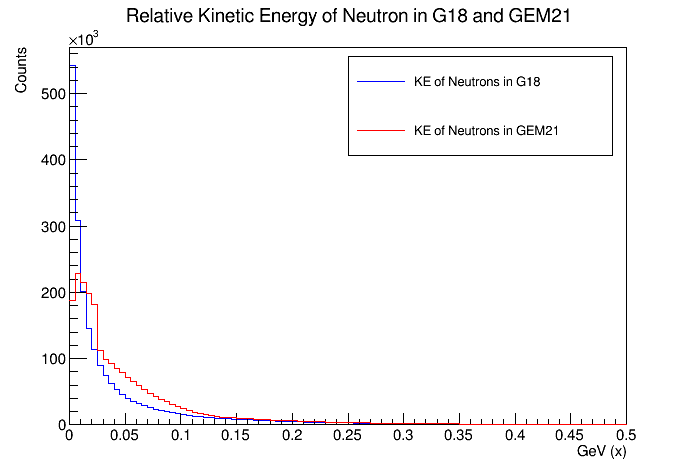

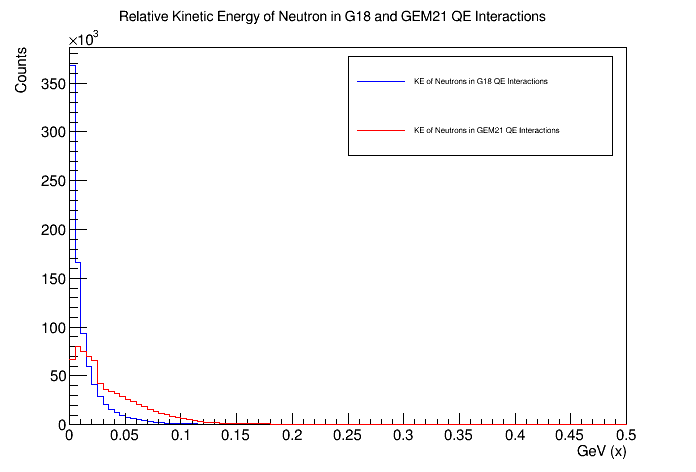

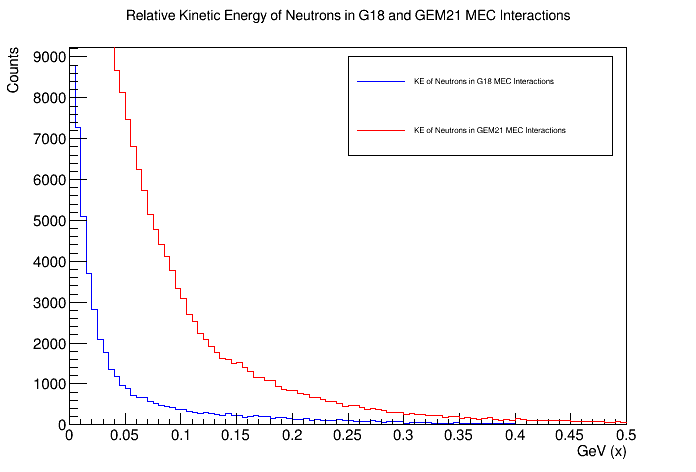

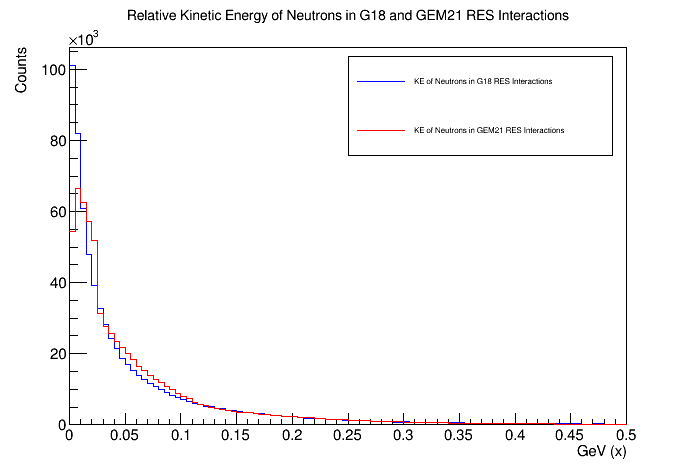

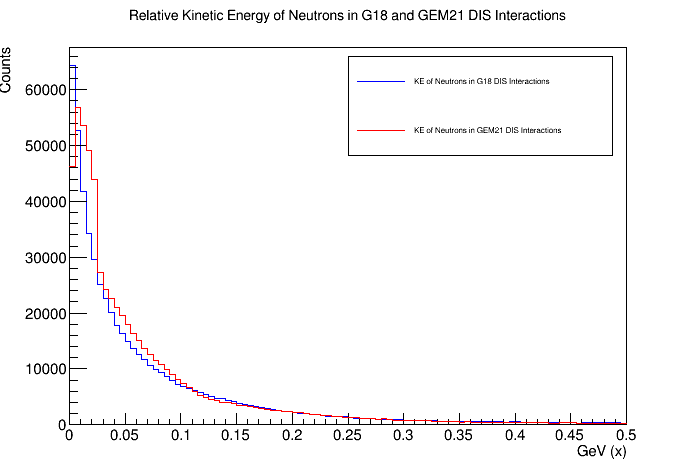

In [209]:
#relativistic kinetic energy of neutron in diff interaction types
#general case
h = ROOT.TCanvas("h")
k_neutron_g18 = ROOT.TH1F("k_neutron_g18", "", 100, 0, 0.5)
k_neutron_g21 = ROOT.TH1F("k_neutron_g21", "", 100, 0, 0.5)

gst_tree_g18.Project("k_neutron_g18", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2112")
gst_tree_gem.Project("k_neutron_g21", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2112")

k_neutron_g18.Draw("same")
k_neutron_g21.Draw("same")

k_neutron_g18.SetTitle("Relative Kinetic Energy of Neutron in G18 and GEM21;GeV (x); Counts")

k_neutron_g18.SetLineColor(ROOT.kBlue)
k_neutron_g21.SetLineColor(ROOT.kRed)

legh = ROOT.TLegend(1,1,1,1)
legh.AddEntry("k_neutron_g18", "KE of Neutrons in G18", "l")
legh.AddEntry("k_neutron_g21", "KE of Neutrons in GEM21", "l")

legh.Draw()
h.Draw()

#quasi elastic case
a = ROOT.TCanvas("a")
k_neutron_g18q = ROOT.TH1F("k_neutron_g18q", "", 100, 0, 0.5)
k_neutron_g21q = ROOT.TH1F("k_neutron_g21q", "", 100, 0, 0.5)

gst_tree_g18.Project("k_neutron_g18q", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2112&&qel==1")
gst_tree_gem.Project("k_neutron_g21q", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2112&&qel==1")

k_neutron_g18q.Draw("same")
k_neutron_g21q.Draw("same")

k_neutron_g18q.SetTitle("Relative Kinetic Energy of Neutron in G18 and GEM21 QE Interactions;GeV (x); Counts")

k_neutron_g18q.SetLineColor(ROOT.kBlue)
k_neutron_g21q.SetLineColor(ROOT.kRed)


lega = ROOT.TLegend(1,1,1,1)
lega.AddEntry("k_neutron_g18q", "KE of Neutrons in G18 QE Interactions", "l")
lega.AddEntry("k_neutron_g21q", "KE of Neutrons in GEM21 QE Interactions", "l")

lega.Draw()
a.Draw()

#mec case
m = ROOT.TCanvas("m")
k_neutron_g18m = ROOT.TH1F("k_neutron_g18m", "", 100, 0, 0.5)
k_neutron_g21m = ROOT.TH1F("k_neutron_g21m", "", 100, 0, 0.5)

gst_tree_g18.Project("k_neutron_g18m", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2112&&mec==1")
gst_tree_gem.Project("k_neutron_g21m", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2112&&mec==1")

k_neutron_g18m.Draw("same")
k_neutron_g21m.Draw("same")

k_neutron_g18m.SetTitle("Relative Kinetic Energy of Neutrons in G18 and GEM21 MEC Interactions;GeV (x); Counts")

k_neutron_g18m.SetLineColor(ROOT.kBlue)
k_neutron_g21m.SetLineColor(ROOT.kRed)


legm = ROOT.TLegend(0.9, 0.9, 0.9, 0.9)
legm.AddEntry("k_neutron_g18m", "KE of Neutrons in G18 MEC Interactions", "l")
legm.AddEntry("k_neutron_g21m", "KE of Neutrons in GEM21 MEC Interactions", "l")

legm.Draw()
m.Draw()

#res case
r = ROOT.TCanvas("r")
k_neutron_g18r = ROOT.TH1F("k_neutron_g18r", "", 100, 0, 0.5)
k_neutron_g21r = ROOT.TH1F("k_neutron_g21r", "", 100, 0, 0.5)

gst_tree_g18.Project("k_neutron_g18r", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2112&&res==1")
gst_tree_gem.Project("k_neutron_g21r", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2112&&res==1")

k_neutron_g18r.Draw("same")
k_neutron_g21r.Draw("same")

k_neutron_g18r.SetTitle("Relative Kinetic Energy of Neutrons in G18 and GEM21 RES Interactions;GeV (x); Counts")

k_neutron_g18r.SetLineColor(ROOT.kBlue)
k_neutron_g21r.SetLineColor(ROOT.kRed)

legr = ROOT.TLegend(1,1,1,1)
legr.AddEntry("k_neutron_g18r", "KE of Neutrons in G18 RES Interactions", "l")
legr.AddEntry("k_neutron_g21r", "KE of Neutrons in GEM21 RES Interactions", "l")

legr.Draw()
r.Draw()

#dis case
d = ROOT.TCanvas("d")
k_neutron_g18d = ROOT.TH1F("k_neutron_g18d", "", 100, 0, 0.5)
k_neutron_g21d = ROOT.TH1F("k_neutron_g21d", "", 100, 0, 0.5)

gst_tree_g18.Project("k_neutron_g18d", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2112&&dis==1")
gst_tree_gem.Project("k_neutron_g21d", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==2112&&dis==1")

k_neutron_g18d.Draw("same")
k_neutron_g21d.Draw("same")

k_neutron_g18d.SetTitle("Relative Kinetic Energy of Neutrons in G18 and GEM21 DIS Interactions;GeV (x); Counts")

k_neutron_g18d.SetLineColor(ROOT.kBlue)
k_neutron_g21d.SetLineColor(ROOT.kRed)


legd = ROOT.TLegend(1,1,1,1)
legd.AddEntry("k_neutron_g18d", "KE of Neutrons in G18 DIS Interactions", "l")
legd.AddEntry("k_neutron_g21d", "KE of Neutrons in GEM21 DIS Interactions", "l")

legd.Draw()
d.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: k_pion_g18 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: k_pion_g21 (Potential memory leak).
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TCanvas::Constructor>: Deleting canvas with same name: a
Warning in <TFile::Append>: Replacing existing TH1: k_pion_g18q (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: k_pion_g21q (Potential memory leak).
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TCanvas::Constructor>: Deleting canvas with same name: m
Warning in <TFile::Append>: Replacing existing TH1: k_pion_g18m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: k_pion_g21m (Potential memory leak).
Warning in <TLegend::Paint>: Legend too large to be automat

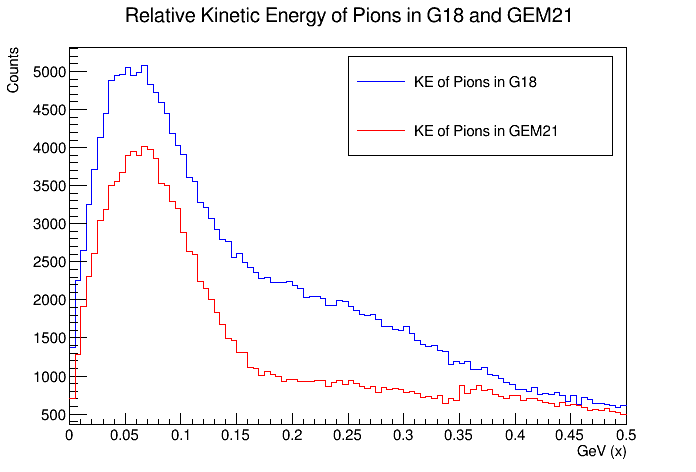

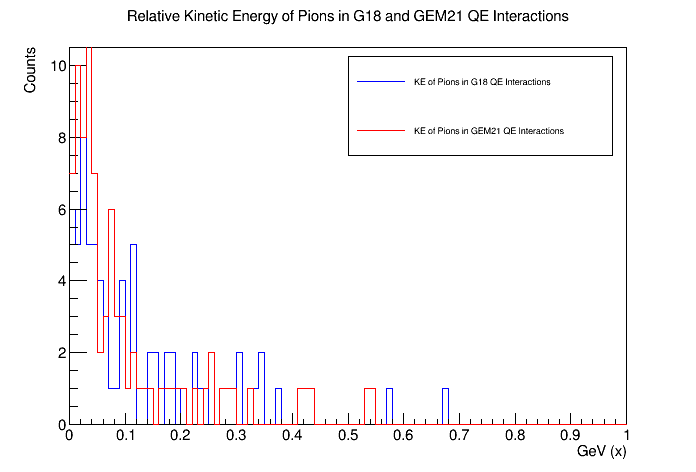

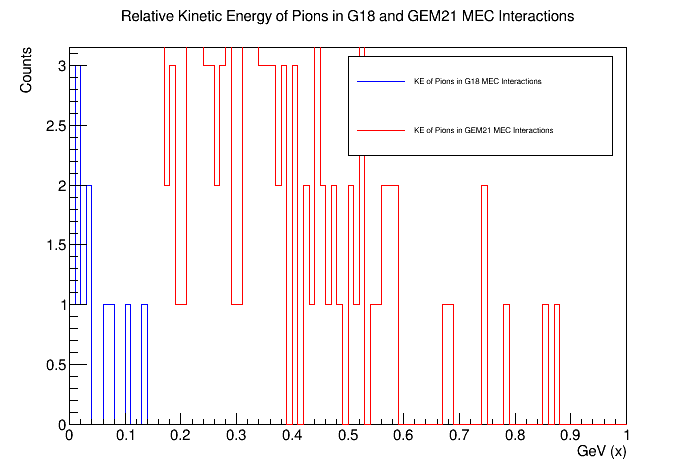

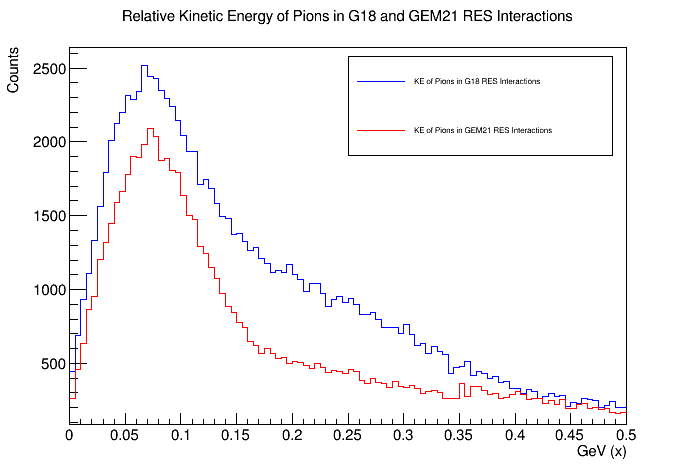

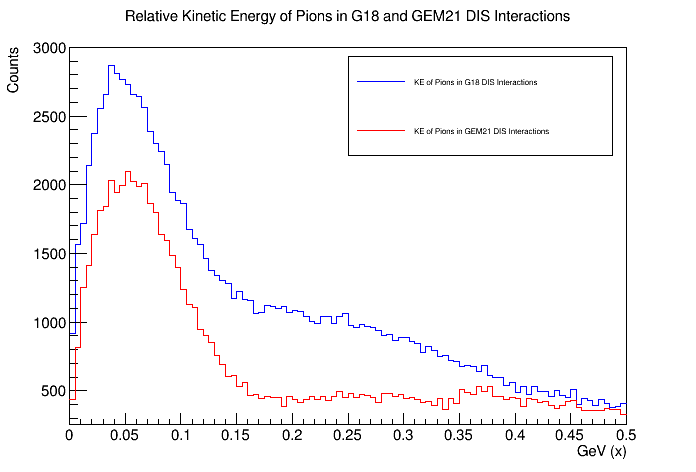

In [218]:
#relativistic kinetic energy of neutral pions in diff interaction types
#general case neutral pion 
h = ROOT.TCanvas("h")
k_pion_g18 = ROOT.TH1F("k_pion_g18", "", 100, 0, 0.5)
k_pion_g21 = ROOT.TH1F("k_pion_g21", "", 100, 0, 0.5)

gst_tree_g18.Project("k_pion_g18", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==111")
gst_tree_gem.Project("k_pion_g21", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==111")

k_pion_g18.Draw("same")
k_pion_g21.Draw("same")

k_pion_g18.SetTitle("Relative Kinetic Energy of Neutral Pions in G18 and GEM21;GeV (x); Counts")

k_pion_g18.SetLineColor(ROOT.kBlue)
k_pion_g21.SetLineColor(ROOT.kRed)

legh = ROOT.TLegend(1,1,1,1)
legh.AddEntry("k_pion_g18", "KE of Neutral Pions in G18", "l")
legh.AddEntry("k_pion_g21", "KE of Neutral Pions in GEM21", "l")

legh.Draw()
h.Draw()

#quasi elastic case
a = ROOT.TCanvas("a")
k_pion_g18q = ROOT.TH1F("k_pion_g18q", "", 100, 0, 1.0)
k_pion_g21q = ROOT.TH1F("k_pion_g21q", "", 100, 0, 1.0)

gst_tree_g18.Project("k_pion_g18q", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==111&&qel==1")
gst_tree_gem.Project("k_pion_g21q", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==111&&qel==1")

k_pion_g18q.Draw("same")
k_pion_g21q.Draw("same")

k_pion_g18q.SetTitle("Relative Kinetic Energy of Neutral Pions in G18 and GEM21 QE Interactions;GeV (x); Counts")

k_pion_g18q.SetLineColor(ROOT.kBlue)
k_pion_g21q.SetLineColor(ROOT.kRed)


lega = ROOT.TLegend(1,1,1,1)
lega.AddEntry("k_pion_g18q", "KE of Neutral Pions in G18 QE Interactions", "l")
lega.AddEntry("k_pion_g21q", "KE of Neutral Pions in GEM21 QE Interactions", "l")

lega.Draw()
a.Draw()

#mec case
m = ROOT.TCanvas("m")
k_pion_g18m = ROOT.TH1F("k_pion_g18m", "", 100, 0, 1.0)
k_pion_g21m = ROOT.TH1F("k_pion_g21m", "", 100, 0, 1.0)

gst_tree_g18.Project("k_pion_g18m", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==111&&mec==1")
gst_tree_gem.Project("k_pion_g21m", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==111&&mec==1")

k_pion_g18m.Draw("same")
k_pion_g21m.Draw("same")

k_pion_g18m.SetTitle("Relative Kinetic Neutral Energy of Pions in G18 and GEM21 MEC Interactions;GeV (x); Counts")

k_pion_g18m.SetLineColor(ROOT.kBlue)
k_pion_g21m.SetLineColor(ROOT.kRed)


legm = ROOT.TLegend(0.9, 0.9, 0.9, 0.9)
legm.AddEntry("k_pion_g18m", "KE of Neutral Pions in G18 MEC Interactions", "l")
legm.AddEntry("k_pion_g21m", "KE of Neutral Pions in GEM21 MEC Interactions", "l")

legm.Draw()
m.Draw()

#res case
r = ROOT.TCanvas("r")
k_pion_g18r = ROOT.TH1F("k_pion_g18r", "", 100, 0, 0.5)
k_pion_g21r = ROOT.TH1F("k_pion_g21r", "", 100, 0, 0.5)

gst_tree_g18.Project("k_pion_g18r", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==111&&res==1")
gst_tree_gem.Project("k_pion_g21r", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==111&&res==1")

k_pion_g18r.Draw("same")
k_pion_g21r.Draw("same")

k_pion_g18r.SetTitle("Relative Kinetic Energy of Neutral Pions in G18 and GEM21 RES Interactions;GeV (x); Counts")

k_pion_g18r.SetLineColor(ROOT.kBlue)
k_pion_g21r.SetLineColor(ROOT.kRed)

legr = ROOT.TLegend(1,1,1,1)
legr.AddEntry("k_pion_g18r", "KE of Neutral Pions in G18 RES Interactions", "l")
legr.AddEntry("k_pion_g21r", "KE of Neutral Pions in GEM21 RES Interactions", "l")

legr.Draw()
r.Draw()

#dis case
d = ROOT.TCanvas("d")
k_pion_g18d = ROOT.TH1F("k_pion_g18d", "", 100, 0, 0.5)
k_pion_g21d = ROOT.TH1F("k_pion_g21d", "", 100, 0, 0.5)

gst_tree_g18.Project("k_pion_g18d", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==111&&dis==1")
gst_tree_gem.Project("k_pion_g21d", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==111&&dis==1")

k_pion_g18d.Draw("same")
k_pion_g21d.Draw("same")

k_pion_g18d.SetTitle("Relative Kinetic Energy of Neutral Pions in G18 and GEM21 DIS Interactions;GeV (x); Counts")

k_pion_g18d.SetLineColor(ROOT.kBlue)
k_pion_g21d.SetLineColor(ROOT.kRed)


legd = ROOT.TLegend(1,1,1,1)
legd.AddEntry("k_pion_g18d", "KE of Neutral Pions in G18 DIS Interactions", "l")
legd.AddEntry("k_pion_g21d", "KE of Neutral Pions in GEM21 DIS Interactions", "l")

legd.Draw()
d.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TCanvas::Constructor>: Deleting canvas with same name: a
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TCanvas::Constructor>: Deleting canvas with same name: m
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TCanvas::Constructor>: Deleting canvas with same name: r
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used
Warning in <TCanvas::Constructor>: Deleting canvas with same name: d
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


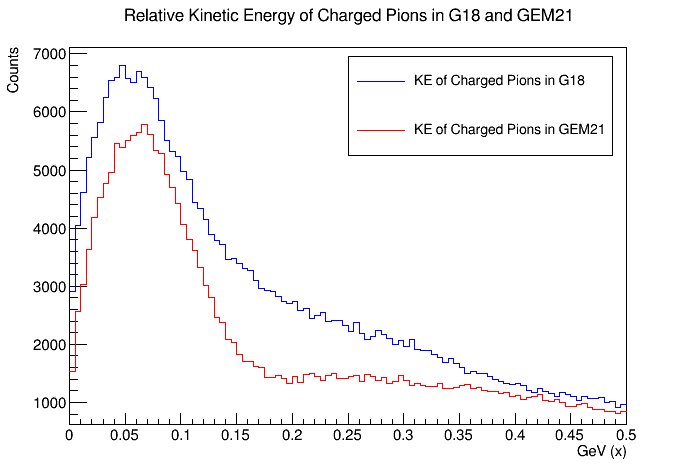

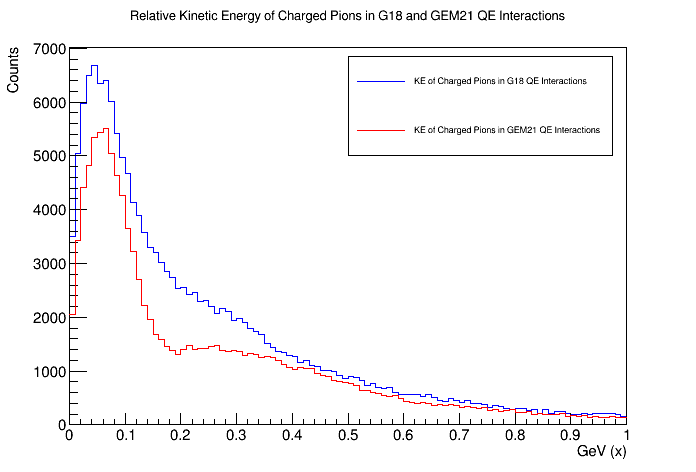

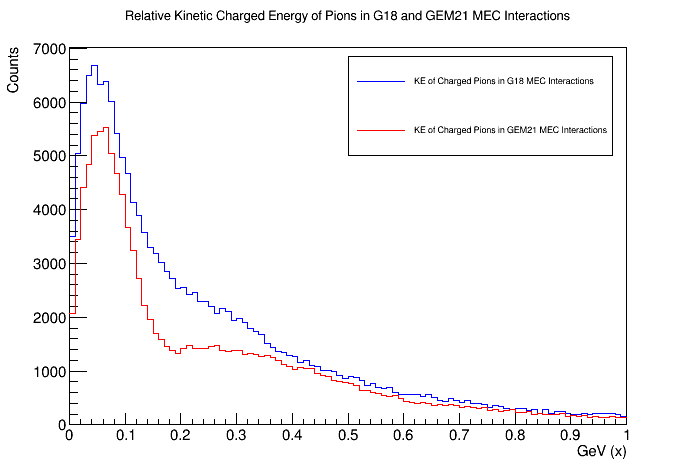

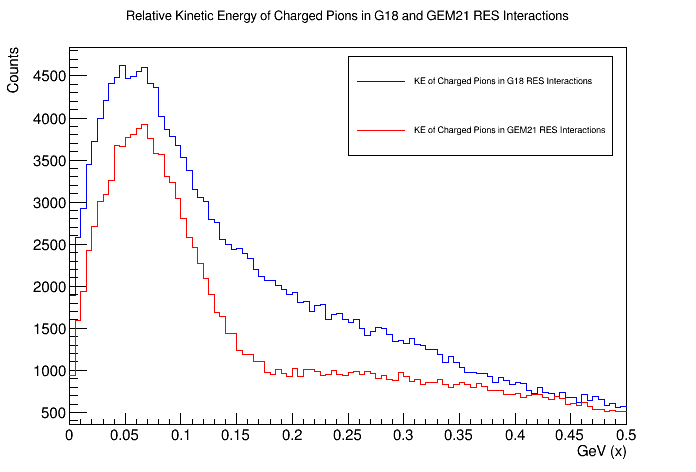

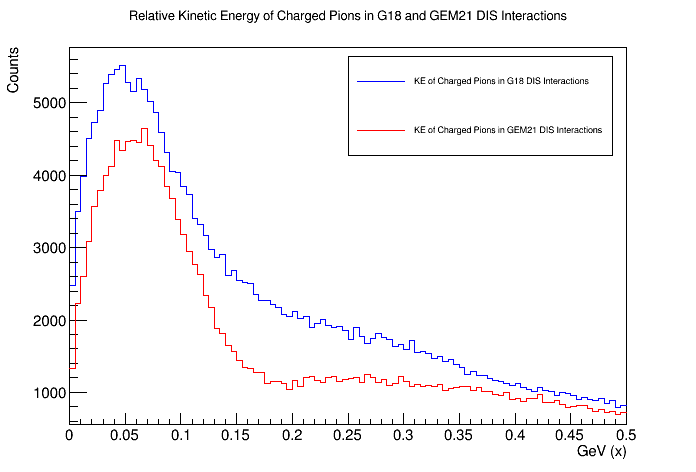

In [232]:
#relativistic kinetic energy of charged pions in diff interaction types
#general case pos 211 neg -211
h = ROOT.TCanvas("h")
k_pion_g18 = ROOT.TH1F("k_pion_g18", "", 100, 0, 0.5)
k_pion_g21 = ROOT.TH1F("k_pion_g21", "", 100, 0, 0.5)

gst_tree_g18.Project("k_pion_g18", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==211||pdgf==-211")
gst_tree_gem.Project("k_pion_g21", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==211||pdgf==-211")

k_pion_g18.Draw("same")
k_pion_g21.Draw("same")

k_pion_g18.SetTitle("Relative Kinetic Energy of Charged Pions in G18 and GEM21;GeV (x); Counts")

k_pion_g18.SetLineColor(ROOT.kBlue)
k_pion_g21.SetLineColor(ROOT.kRed)

legh = ROOT.TLegend(1,1,1,1)
legh.AddEntry("k_pion_g18", "KE of Charged Pions in G18", "l")
legh.AddEntry("k_pion_g21", "KE of Charged Pions in GEM21", "l")

legh.Draw()
h.Draw()

#quasi elastic case
a = ROOT.TCanvas("a")
k_pion_g18q = ROOT.TH1F("k_pion_g18q", "", 100, 0, 1.0)
k_pion_g21q = ROOT.TH1F("k_pion_g21q", "", 100, 0, 1.0)

gst_tree_g18.Project("k_pion_g18q", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==211||pdgf==-211&&qel==1")
gst_tree_gem.Project("k_pion_g21q", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==211||pdgf==-211&&qel==1")

k_pion_g18q.Draw("same")
k_pion_g21q.Draw("same")

k_pion_g18q.SetTitle("Relative Kinetic Energy of Charged Pions in G18 and GEM21 QE Interactions;GeV (x); Counts")

k_pion_g18q.SetLineColor(ROOT.kBlue)
k_pion_g21q.SetLineColor(ROOT.kRed)


lega = ROOT.TLegend(1,1,1,1)
lega.AddEntry("k_pion_g18q", "KE of Charged Pions in G18 QE Interactions", "l")
lega.AddEntry("k_pion_g21q", "KE of Charged Pions in GEM21 QE Interactions", "l")

lega.Draw()
a.Draw()

#mec case
m = ROOT.TCanvas("m")
k_pion_g18m = ROOT.TH1F("k_pion_g18m", "", 100, 0, 1.0)
k_pion_g21m = ROOT.TH1F("k_pion_g21m", "", 100, 0, 1.0)

gst_tree_g18.Project("k_pion_g18m", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==211||pdgf==-211&&mec==1")
gst_tree_gem.Project("k_pion_g21m", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==211||pdgf==-211&&mec==1")

k_pion_g18m.Draw("same")
k_pion_g21m.Draw("same")

k_pion_g18m.SetTitle("Relative Kinetic Charged Energy of Pions in G18 and GEM21 MEC Interactions;GeV (x); Counts")

k_pion_g18m.SetLineColor(ROOT.kBlue)
k_pion_g21m.SetLineColor(ROOT.kRed)


legm = ROOT.TLegend(0.9, 0.9, 0.9, 0.9)
legm.AddEntry("k_pion_g18m", "KE of Charged Pions in G18 MEC Interactions", "l")
legm.AddEntry("k_pion_g21m", "KE of Charged Pions in GEM21 MEC Interactions", "l")

legm.Draw()
m.Draw()

#res case
r = ROOT.TCanvas("r")
k_pion_g18r = ROOT.TH1F("k_pion_g18r", "", 100, 0, 0.5)
k_pion_g21r = ROOT.TH1F("k_pion_g21r", "", 100, 0, 0.5)

gst_tree_g18.Project("k_pion_g18r", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==211||pdgf==-211&&res==1")
gst_tree_gem.Project("k_pion_g21r", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==211||pdgf==-211&&res==1")

k_pion_g18r.Draw("same")
k_pion_g21r.Draw("same")

k_pion_g18r.SetTitle("Relative Kinetic Energy of Charged Pions in G18 and GEM21 RES Interactions;GeV (x); Counts")

k_pion_g18r.SetLineColor(ROOT.kBlue)
k_pion_g21r.SetLineColor(ROOT.kRed)

legr = ROOT.TLegend(1,1,1,1)
legr.AddEntry("k_pion_g18r", "KE of Charged Pions in G18 RES Interactions", "l")
legr.AddEntry("k_pion_g21r", "KE of Charged Pions in GEM21 RES Interactions", "l")

legr.Draw()
r.Draw()

#dis case
d = ROOT.TCanvas("d")
k_pion_g18d = ROOT.TH1F("k_pion_g18d", "", 100, 0, 0.5)
k_pion_g21d = ROOT.TH1F("k_pion_g21d", "", 100, 0, 0.5)

gst_tree_g18.Project("k_pion_g18d", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==211||pdgf==-211&&dis==1")
gst_tree_gem.Project("k_pion_g21d", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==211||pdgf==-211&&dis==1")

k_pion_g18d.Draw("same")
k_pion_g21d.Draw("same")

k_pion_g18d.SetTitle("Relative Kinetic Energy of Charged Pions in G18 and GEM21 DIS Interactions;GeV (x); Counts")

k_pion_g18d.SetLineColor(ROOT.kBlue)
k_pion_g21d.SetLineColor(ROOT.kRed)


legd = ROOT.TLegend(1,1,1,1)
legd.AddEntry("k_pion_g18d", "KE of Charged Pions in G18 DIS Interactions", "l")
legd.AddEntry("k_pion_g21d", "KE of Charged Pions in GEM21 DIS Interactions", "l")

legd.Draw()
d.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: k_pion_g18 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: k_pion_g21 (Potential memory leak).
Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


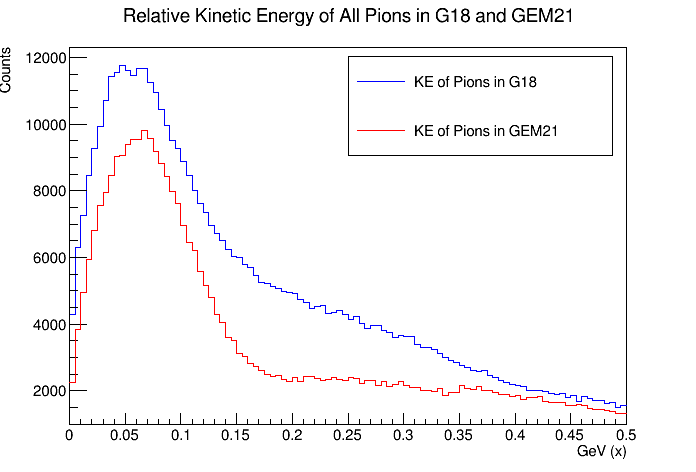

In [276]:
#relativistic kinetic energy of pions in diff interaction types, hadron? and how to combine all types of pions? test
#general case neutral pion 111 pos 211 neg -211
h = ROOT.TCanvas("h")
k_pion_g18 = ROOT.TH1F("k_pion_g18", "", 100, 0, 0.5)
k_pion_g21 = ROOT.TH1F("k_pion_g21", "", 100, 0, 0.5)

gst_tree_g18.Project("k_pion_g18", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==111||pdgf==211||pdgf==-211")
gst_tree_gem.Project("k_pion_g21", "Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2)", "pdgf==111||pdgf==211||pdgf==-211")

#n_events_passing_cut = gst_tree_g18.Filter("qel==1").Count()
#print(n_events_passing_cut)
#n_entries_in_hist = my_hist.GetEntries()
k_pion_g18.Draw("same")
k_pion_g21.Draw("same")

k_pion_g18.SetTitle("Relative Kinetic Energy of All Pions in G18 and GEM21;GeV (x); Counts")

k_pion_g18.SetLineColor(ROOT.kBlue)
k_pion_g21.SetLineColor(ROOT.kRed)

legh = ROOT.TLegend(1,1,1,1)
legh.AddEntry("k_pion_g18", "KE of Pions in G18", "l")
legh.AddEntry("k_pion_g21", "KE of Pions in GEM21", "l")

legh.Draw()
h.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: p_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: n_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pi_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pic_angle (Potential memory leak).


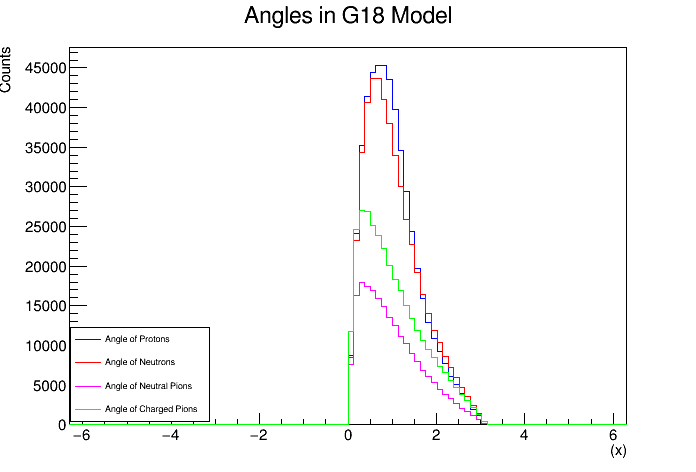

In [22]:
#angles in g18 model
h = ROOT.TCanvas("h")
p_angle = ROOT.TH1F("p_angle", "", 100, -6.3, 6.3)
gst_tree_g18.Project("p_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2212&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06") #&&atan((sqrt(pxf**2+pyf**2))/(pzf))>0.698132
p_angle.SetTitle("Angles in G18 Model;(x);Counts")
p_angle.SetLineColor(ROOT.kBlue)
p_angle.Draw("same")
leg = ROOT.TLegend(0.2, 0.2, 0.2, 0.2)
leg.AddEntry("p_angle", "Angle of Protons", "l")

#pt within +-40 degrees neutron
n_angle = ROOT.TH1F("n_angle", "", 100, -6.3, 6.3)
gst_tree_g18.Project("n_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2112&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06")
n_angle.SetLineColor(ROOT.kRed)
n_angle.Draw("same")
leg.AddEntry("n_angle", "Angle of Neutrons", "l")

#pt within +-40 degrees neutral pion
pi_angle = ROOT.TH1F("pi_angle", "", 100, -6.3, 6.3)
gst_tree_g18.Project("pi_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==111&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06")
pi_angle.SetLineColor(ROOT.kMagenta)
pi_angle.Draw("same")
leg.AddEntry("pi_angle", "Angle of Neutral Pions", "l")

#pt within +-40 degrees charged pions
pic_angle = ROOT.TH1F("pic_angle", "", 100, -6.3, 6.3)
gst_tree_g18.Project("pic_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==211||pdgf==-211&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06")
pic_angle.SetLineColor(ROOT.kGreen)
pic_angle.Draw("same")
leg.AddEntry("pic_angle", "Angle of Charged Pions", "l")

#break down by interaction type and lep pt and angle cut

leg.Draw()
h.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: p_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: n_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pi_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pic_angle (Potential memory leak).


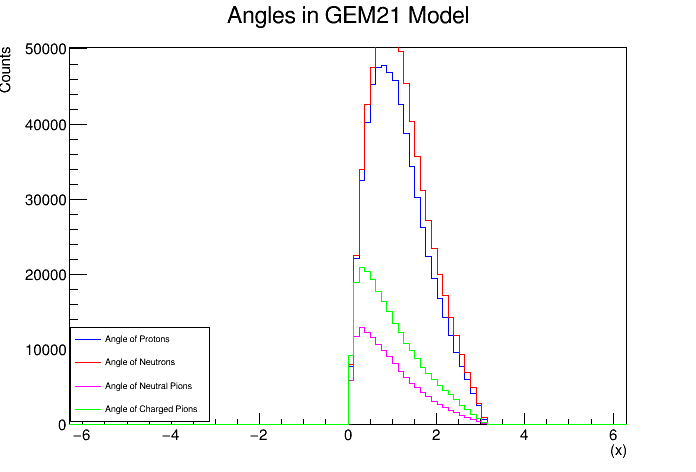

In [24]:
#angles in gem model
h = ROOT.TCanvas("h")
p_angle = ROOT.TH1F("p_angle", "", 100, -6.3, 6.3)
gst_tree_gem.Project("p_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2212&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06") #&&atan((sqrt(pxf**2+pyf**2))/(pzf))>0.698132
p_angle.SetTitle("Angles in GEM21 Model;(x);Counts")
p_angle.SetLineColor(ROOT.kBlue)
p_angle.Draw("same")
leg = ROOT.TLegend(0.2, 0.2, 0.2, 0.2)
leg.AddEntry("p_angle", "Angle of Protons", "l")

#pt within +-40 degrees neutron
n_angle = ROOT.TH1F("n_angle", "", 100, -6.3, 6.3)
gst_tree_gem.Project("n_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2112&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06")
n_angle.SetLineColor(ROOT.kRed)
n_angle.Draw("same")
leg.AddEntry("n_angle", "Angle of Neutrons", "l")

#pt within +-40 degrees neutral pion
pi_angle = ROOT.TH1F("pi_angle", "", 100, -6.3, 6.3)
gst_tree_gem.Project("pi_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==111&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06")
pi_angle.SetLineColor(ROOT.kMagenta)
pi_angle.Draw("same")
leg.AddEntry("pi_angle", "Angle of Neutral Pions", "l")

#pt within +-40 degrees charged pions
pic_angle = ROOT.TH1F("pic_angle", "", 100, -6.3, 6.3)
gst_tree_gem.Project("pic_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==211||pdgf==-211&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06")
pic_angle.SetLineColor(ROOT.kGreen)
pic_angle.Draw("same")
leg.AddEntry("pic_angle", "Angle of Charged Pions", "l")

#break down by interaction type and lep pt and angle cut

leg.Draw()
h.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: p_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: n_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pi_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pic_angle (Potential memory leak).


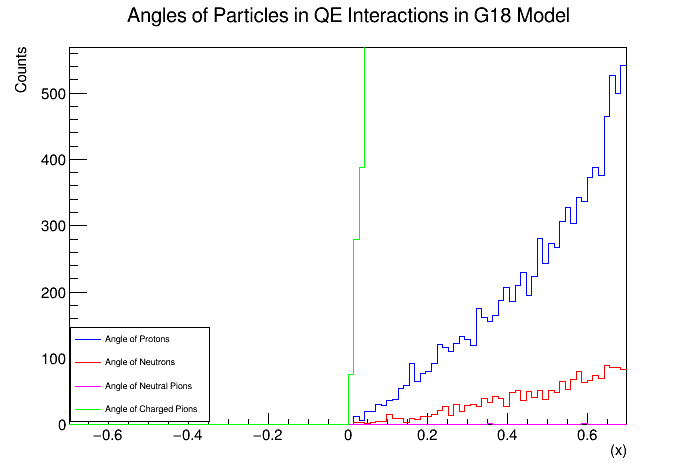

In [25]:
#plot amounts for interaction types, 60 mev charged hadrons 100 mev neutrons
#break down by interaction type and lep pt and angle cut g18 model

acceptance = radians(40)
h = ROOT.TCanvas("h")
p_angle = ROOT.TH1F("p_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("p_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2212&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&qel==1") #&&atan((sqrt(pxf**2+pyf**2))/(pzf))>0.698132
p_angle.SetTitle("Angles of Particles in QE Interactions in G18 Model;(x);Counts")
p_angle.SetLineColor(ROOT.kBlue)
p_angle.Draw("same")
leg = ROOT.TLegend(0.2, 0.2, 0.2, 0.2)
leg.AddEntry("p_angle", "Angle of Protons", "l")

#pt within +-40 degrees neutron
n_angle = ROOT.TH1F("n_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("n_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2112&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.1&&qel==1")
n_angle.SetLineColor(ROOT.kRed)
n_angle.Draw("same")
leg.AddEntry("n_angle", "Angle of Neutrons", "l")

#pt within +-40 degrees neutral pion
pi_angle = ROOT.TH1F("pi_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("pi_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==111&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&qel==1")
pi_angle.SetLineColor(ROOT.kMagenta)
pi_angle.Draw("same")
leg.AddEntry("pi_angle", "Angle of Neutral Pions", "l")

#pt within +-40 degrees charged pions
pic_angle = ROOT.TH1F("pic_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("pic_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==211||pdgf==-211&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&qel==1")
pic_angle.SetLineColor(ROOT.kGreen)
pic_angle.Draw("same")
leg.AddEntry("pic_angle", "Angle of Charged Pions", "l")

leg.Draw()
h.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: p_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: n_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pi_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pic_angle (Potential memory leak).


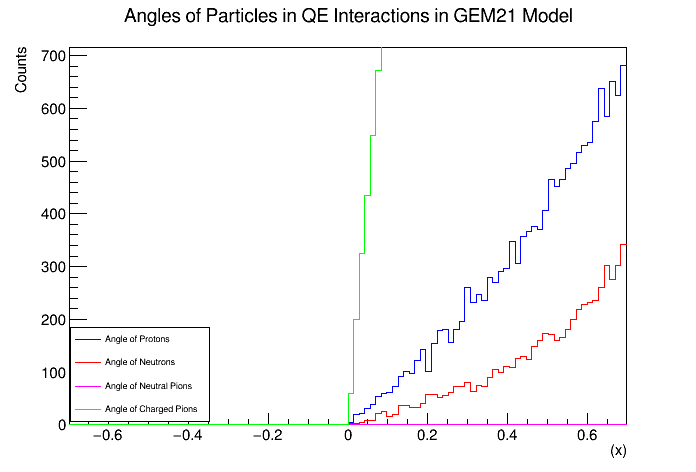

In [34]:
#plot amounts for interaction types, 60 mev charged hadrons 100 mev neutrons
#break down by interaction type and lep pt and angle cut gem model

acceptance = radians(40)
h = ROOT.TCanvas("h")
p_angle = ROOT.TH1F("p_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("p_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2212&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&qel==1") #&&atan((sqrt(pxf**2+pyf**2))/(pzf))>0.698132
p_angle.SetTitle("Angles of Particles in QE Interactions in GEM21 Model;(x);Counts")
p_angle.SetLineColor(ROOT.kBlue)
p_angle.Draw("same")
leg = ROOT.TLegend(0.2, 0.2, 0.2, 0.2)
leg.AddEntry("p_angle", "Angle of Protons", "l")

#pt within +-40 degrees neutron
n_angle = ROOT.TH1F("n_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("n_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2112&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.1&&qel==1")
n_angle.SetLineColor(ROOT.kRed)
n_angle.Draw("same")
leg.AddEntry("n_angle", "Angle of Neutrons", "l")

#pt within +-40 degrees neutral pion
pi_angle = ROOT.TH1F("pi_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("pi_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==111&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&qel==1")
pi_angle.SetLineColor(ROOT.kMagenta)
pi_angle.Draw("same")
leg.AddEntry("pi_angle", "Angle of Neutral Pions", "l")

#pt within +-40 degrees charged pions
pic_angle = ROOT.TH1F("pic_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("pic_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==211||pdgf==-211&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&qel==1")
pic_angle.SetLineColor(ROOT.kGreen)
pic_angle.Draw("same")
leg.AddEntry("pic_angle", "Angle of Charged Pions", "l")
#zero pions show when either pdgf==211 or pdgf==-211 but when using or statement we get unbounded green line?
leg.Draw()
h.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: p_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: n_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pi_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pic_angle (Potential memory leak).


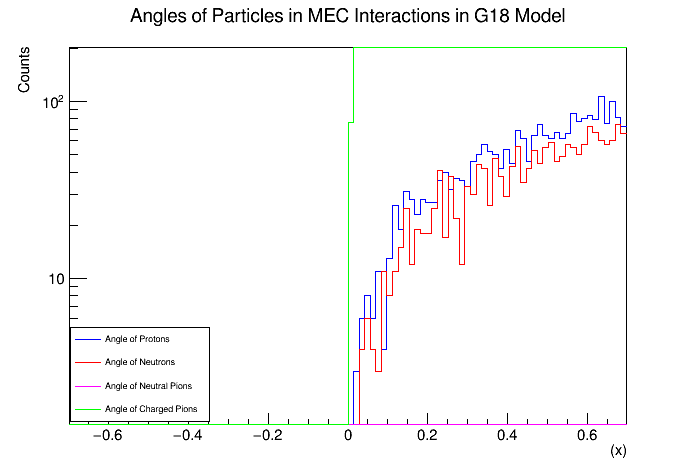

In [29]:
#angles for mec interactions g18 model
acceptance = radians(40)
h = ROOT.TCanvas("h")
p_angle = ROOT.TH1F("p_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("p_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2212&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&mec==1") #&&atan((sqrt(pxf**2+pyf**2))/(pzf))>0.698132
p_angle.SetTitle("Angles of Particles in MEC Interactions in G18 Model;(x);Counts")
p_angle.SetLineColor(ROOT.kBlue)
p_angle.Draw("same")
leg = ROOT.TLegend(0.2, 0.2, 0.2, 0.2)
leg.AddEntry("p_angle", "Angle of Protons", "l")

#pt within +-40 degrees neutron
n_angle = ROOT.TH1F("n_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("n_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2112&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.1&&mec==1")
n_angle.SetLineColor(ROOT.kRed)
n_angle.Draw("same")
leg.AddEntry("n_angle", "Angle of Neutrons", "l")

#pt within +-40 degrees neutral pion
pi_angle = ROOT.TH1F("pi_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("pi_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==111&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&mec==1")
pi_angle.SetLineColor(ROOT.kMagenta)
pi_angle.Draw("same")
leg.AddEntry("pi_angle", "Angle of Neutral Pions", "l")

#pt within +-40 degrees charged pions
pic_angle = ROOT.TH1F("pic_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("pic_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==211||pdgf==-211&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&mec==1")
pic_angle.SetLineColor(ROOT.kGreen)
pic_angle.Draw("same")
leg.AddEntry("pic_angle", "Angle of Charged Pions", "l")

leg.Draw()
h.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: p_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: n_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pi_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pic_angle (Potential memory leak).


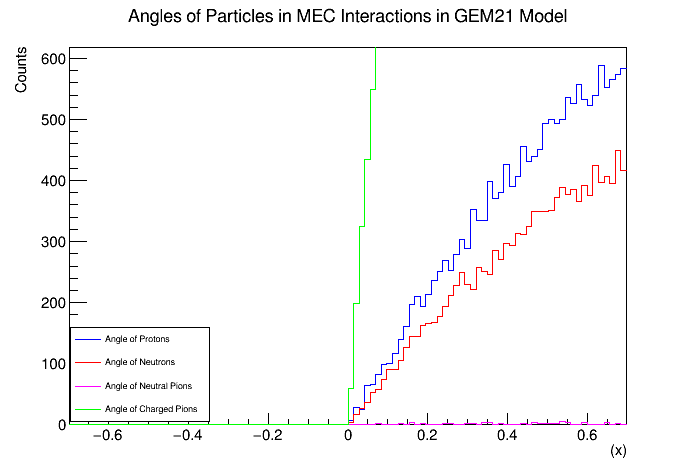

In [28]:
#angles for mec interactions in gem model
acceptance = radians(40)
h = ROOT.TCanvas("h")
p_angle = ROOT.TH1F("p_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("p_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2212&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&mec==1") #&&atan((sqrt(pxf**2+pyf**2))/(pzf))>0.698132
p_angle.SetTitle("Angles of Particles in MEC Interactions in GEM21 Model;(x);Counts")
p_angle.SetLineColor(ROOT.kBlue)
p_angle.Draw("same")
leg = ROOT.TLegend(0.2, 0.2, 0.2, 0.2)
leg.AddEntry("p_angle", "Angle of Protons", "l")

#pt within +-40 degrees neutron
n_angle = ROOT.TH1F("n_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("n_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2112&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.1&&mec==1")
n_angle.SetLineColor(ROOT.kRed)
n_angle.Draw("same")
leg.AddEntry("n_angle", "Angle of Neutrons", "l")

#pt within +-40 degrees neutral pion
pi_angle = ROOT.TH1F("pi_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("pi_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==111&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&mec==1")
pi_angle.SetLineColor(ROOT.kMagenta)
pi_angle.Draw("same")
leg.AddEntry("pi_angle", "Angle of Neutral Pions", "l")

#pt within +-40 degrees charged pions
pic_angle = ROOT.TH1F("pic_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("pic_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==211||pdgf==-211&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&mec==1")
pic_angle.SetLineColor(ROOT.kGreen)
pic_angle.Draw("same")
leg.AddEntry("pic_angle", "Angle of Charged Pions", "l")

leg.Draw()
h.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: p_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: n_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pi_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pic_angle (Potential memory leak).


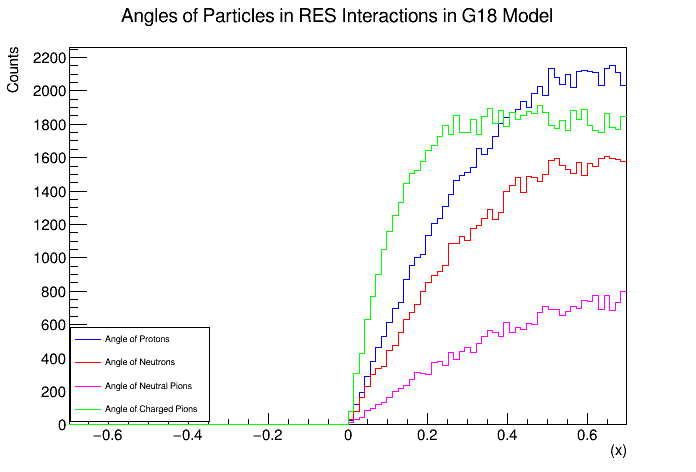

In [35]:
#angles for res interactions in g18
acceptance = radians(40)
h = ROOT.TCanvas("h")
p_angle = ROOT.TH1F("p_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("p_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2212&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&res==1")
p_angle.SetTitle("Angles of Particles in RES Interactions in G18 Model;(x);Counts")
p_angle.SetLineColor(ROOT.kBlue)
p_angle.Draw("same")
leg = ROOT.TLegend(0.2, 0.2, 0.2, 0.2)
leg.AddEntry("p_angle", "Angle of Protons", "l")

#pt within +-40 degrees neutron
n_angle = ROOT.TH1F("n_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("n_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2112&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.1&&res==1")
n_angle.SetLineColor(ROOT.kRed)
n_angle.Draw("same")
leg.AddEntry("n_angle", "Angle of Neutrons", "l")

#pt within +-40 degrees neutral pion
pi_angle = ROOT.TH1F("pi_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("pi_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==111&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&res==1")
pi_angle.SetLineColor(ROOT.kMagenta)
pi_angle.Draw("same")
leg.AddEntry("pi_angle", "Angle of Neutral Pions", "l")

#pt within +-40 degrees charged pions
pic_angle = ROOT.TH1F("pic_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("pic_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==211||pdgf==-211&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&res==1")
pic_angle.SetLineColor(ROOT.kGreen)
pic_angle.Draw("same")
leg.AddEntry("pic_angle", "Angle of Charged Pions", "l")

leg.Draw()
h.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: p_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: n_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pi_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pic_angle (Potential memory leak).


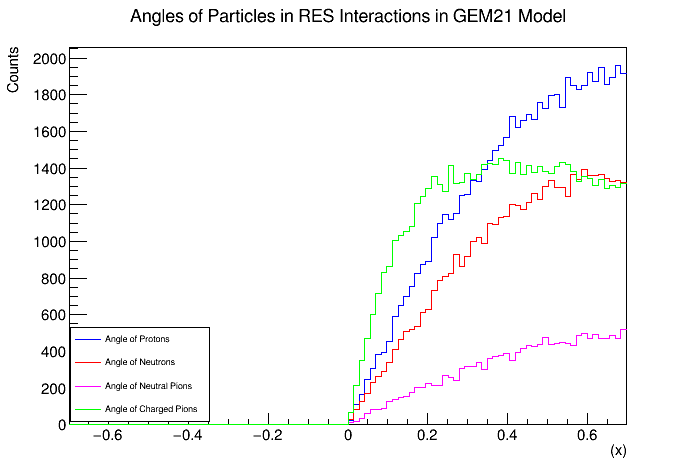

In [36]:
#angles for res interactions in gem model
acceptance = radians(40)
h = ROOT.TCanvas("h")
p_angle = ROOT.TH1F("p_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("p_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2212&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&res==1")
p_angle.SetTitle("Angles of Particles in RES Interactions in GEM21 Model;(x);Counts")
p_angle.SetLineColor(ROOT.kBlue)
p_angle.Draw("same")
leg = ROOT.TLegend(0.2, 0.2, 0.2, 0.2)
leg.AddEntry("p_angle", "Angle of Protons", "l")

#pt within +-40 degrees neutron
n_angle = ROOT.TH1F("n_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("n_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2112&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.1&&res==1")
n_angle.SetLineColor(ROOT.kRed)
n_angle.Draw("same")
leg.AddEntry("n_angle", "Angle of Neutrons", "l")

#pt within +-40 degrees neutral pion
pi_angle = ROOT.TH1F("pi_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("pi_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==111&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&res==1")
pi_angle.SetLineColor(ROOT.kMagenta)
pi_angle.Draw("same")
leg.AddEntry("pi_angle", "Angle of Neutral Pions", "l")

#pt within +-40 degrees charged pions
pic_angle = ROOT.TH1F("pic_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("pic_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==211||pdgf==-211&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&res==1")
pic_angle.SetLineColor(ROOT.kGreen)
pic_angle.Draw("same")
leg.AddEntry("pic_angle", "Angle of Charged Pions", "l")

leg.Draw()
h.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: p_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: n_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pi_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pic_angle (Potential memory leak).


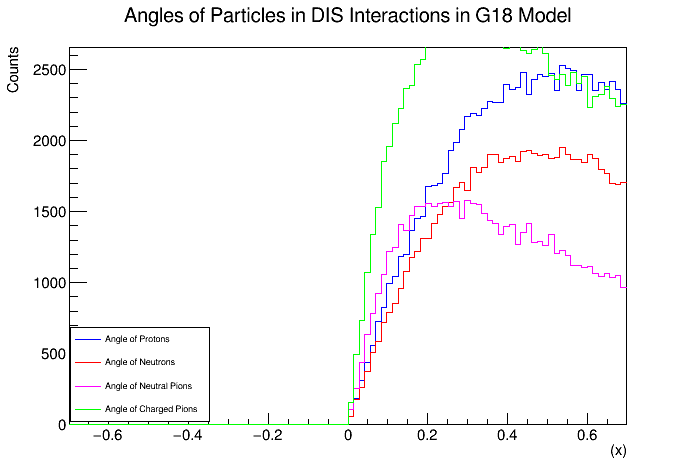

In [37]:
#angles for dis interactions in g18
acceptance = radians(40)
h = ROOT.TCanvas("h")
p_angle = ROOT.TH1F("p_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("p_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2212&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&dis==1")
p_angle.SetTitle("Angles of Particles in DIS Interactions in G18 Model;(x);Counts")
p_angle.SetLineColor(ROOT.kBlue)
p_angle.Draw("same")
leg = ROOT.TLegend(0.2, 0.2, 0.2, 0.2)
leg.AddEntry("p_angle", "Angle of Protons", "l")

#pt within +-40 degrees neutron
n_angle = ROOT.TH1F("n_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("n_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2112&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.1&&dis==1")
n_angle.SetLineColor(ROOT.kRed)
n_angle.Draw("same")
leg.AddEntry("n_angle", "Angle of Neutrons", "l")

#pt within +-40 degrees neutral pion
pi_angle = ROOT.TH1F("pi_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("pi_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==111&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&dis==1")
pi_angle.SetLineColor(ROOT.kMagenta)
pi_angle.Draw("same")
leg.AddEntry("pi_angle", "Angle of Neutral Pions", "l")

#pt within +-40 degrees charged pions
pic_angle = ROOT.TH1F("pic_angle", "", 100, -acceptance, acceptance)
gst_tree_g18.Project("pic_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==211||pdgf==-211&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&dis==1")
pic_angle.SetLineColor(ROOT.kGreen)
pic_angle.Draw("same")
leg.AddEntry("pic_angle", "Angle of Charged Pions", "l")

leg.Draw()
h.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h
Warning in <TFile::Append>: Replacing existing TH1: p_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: n_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pi_angle (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: pic_angle (Potential memory leak).


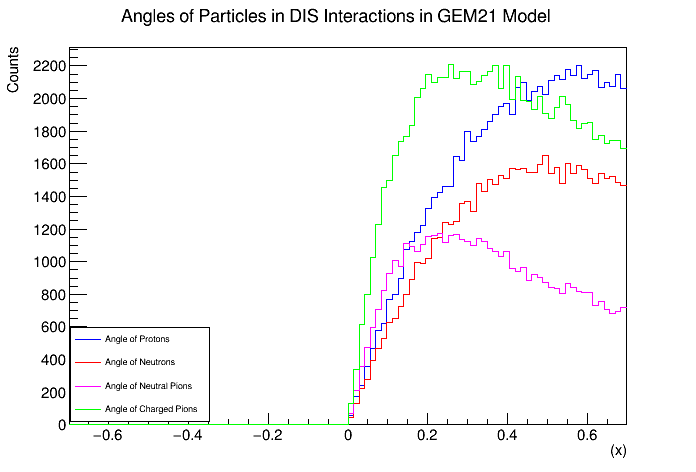

In [38]:
#angles for dis interactions in gem model
acceptance = radians(40)
h = ROOT.TCanvas("h")
p_angle = ROOT.TH1F("p_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("p_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2212&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&dis==1")
p_angle.SetTitle("Angles of Particles in DIS Interactions in GEM21 Model;(x);Counts")
p_angle.SetLineColor(ROOT.kBlue)
p_angle.Draw("same")
leg = ROOT.TLegend(0.2, 0.2, 0.2, 0.2)
leg.AddEntry("p_angle", "Angle of Protons", "l")

#pt within +-40 degrees neutron
n_angle = ROOT.TH1F("n_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("n_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==2112&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.1&&dis==1")
n_angle.SetLineColor(ROOT.kRed)
n_angle.Draw("same")
leg.AddEntry("n_angle", "Angle of Neutrons", "l")

#pt within +-40 degrees neutral pion
pi_angle = ROOT.TH1F("pi_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("pi_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==111&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&dis==1")
pi_angle.SetLineColor(ROOT.kMagenta)
pi_angle.Draw("same")
leg.AddEntry("pi_angle", "Angle of Neutral Pions", "l")

#pt within +-40 degrees charged pions
pic_angle = ROOT.TH1F("pic_angle", "", 100, -acceptance, acceptance)
gst_tree_gem.Project("pic_angle", "atan2((sqrt(pxf**2+pyf**2)),(pzf))", "pdgf==211||pdgf==-211&&(Ef - sqrt(Ef**2 - (sqrt(pxf**2+pyf**2+pzf**2))**2))>0.06&&dis==1")
pic_angle.SetLineColor(ROOT.kGreen)
pic_angle.Draw("same")
leg.AddEntry("pic_angle", "Angle of Charged Pions", "l")

leg.Draw()
h.Draw()